# Initial Setup

In [2]:
from pathlib import Path
import yaml

In [3]:
current_directory = Path(os.path.abspath(''))
with open(current_directory / "config.yaml") as f:
    documents = yaml.full_load(f)

In [4]:
general = documents.get("general")
verbose = general.get("verbose")

# environment parameters
env = documents.get("environment")
output_folder = env.get("output_folder")
input_path = Path(output_folder) / "02_Feature_Selection"
output_path = Path(output_folder) / "03_Model_Training"

# # training
# training  = documents.get("training")
# training

In [5]:
%load_ext autoreload

In [6]:
%autoreload 2

In [7]:
import pandas as pd
X_train_base = pd.read_csv(f"{input_path}/X_train_scaled_anova.csv")
X_test_base = pd.read_csv(f"{input_path}/X_test_scaled_anova.csv")
X_train_kbins_base = pd.read_csv(f"{input_path}/X_train_kbins.csv")
X_test_kbins_base = pd.read_csv(f"{input_path}/X_test_kbins.csv")
# X_train_reduced_base = pd.read_csv(f"{input_path}/X_train_reduced.csv")
# X_test_reduced_base = pd.read_csv(f"{input_path}/X_test_reduced.csv")

In [8]:
prospects = pd.read_csv(f"{Path(output_folder)}/01_Initial_Data_Prep/training_sampled_data.csv")
prospects = prospects.loc[:,["lg_seq_index", "duns_number"]]
prospects

,lg_seq_index,duns_number
0,1185,14833207
1,2178,22463288
2,2676,27260309
3,3752,37624504
4,4330,42743689
...,...,...
33515,3413478,107428321
33516,797632,93373977
33517,2043461,70692146
33518,1017800,4851545


In [9]:
X_train_base.columns

Index(['lg_seq_index', 'work_at_home', 'in_business', 'primary_naics_code_id',
       'labels_primary_naics_code_id', 'has_phone_flg',
       'physical_state_abbreviation', 'primary_naics2_code_id',
       'primary_naics3_code_id', 'zip_code_adj', 'in_business_A',
       'in_business_M', 'in_business_S', 'in_business_X',
       'physical_state_abbreviation_AR', 'physical_state_abbreviation_AZ',
       'physical_state_abbreviation_CA', 'physical_state_abbreviation_CO',
       'physical_state_abbreviation_CT', 'physical_state_abbreviation_DC',
       'physical_state_abbreviation_FL', 'physical_state_abbreviation_GA',
       'physical_state_abbreviation_IA', 'physical_state_abbreviation_ID',
       'physical_state_abbreviation_KS', 'physical_state_abbreviation_LA',
       'physical_state_abbreviation_MA', 'physical_state_abbreviation_MD',
       'physical_state_abbreviation_MO', 'physical_state_abbreviation_NC',
       'physical_state_abbreviation_NE', 'physical_state_abbreviation_NV',
  

In [10]:
# https://www.uttyler.edu/hibbs-institute/files/faq/what_are_the_naics_codes.pdf
naics2_dict = {
    11: "Agriculture, Forestry, Fishing and Hunting",
    21: "Mining, Quarrying, and Oil and Gas Extraction",
    22: "Utilities",
    23: "Construction",
    31: "Manufacturing",
    32: "Manufacturing",
    33: "Manufacturing",
    42: "Wholesale Trade",
    44: "Retail Trade",
    45: "Retail Trade",
    48: "Transportation and Warehousing",
    49: "Transportation and Warehousing",
    51: "Information",
    52: "Finance and Insurance",
    53: "Real Estate and Rental and Leasing",
    54: "Professional, Scientific, and Technical Services",
    55: "Management of Companies and Enterprises",
    56: "Administrative and Support and Waste Management and Remediation Services",
    61: "Educational Services",
    62: "Health Care and Social Assistance",
    71: "Arts, Entertainment, and Recreation",
    72: "Accommodation and Food Services",
    81: "Other Services (except Public Administration)",
    92: "Public Administration",
    99: "Nonclassifiable Establishments",
}
X_train_base["labels_primary_naics2_code_id"] = X_train_base.primary_naics2_code_id.map(naics2_dict)
X_test_base["labels_primary_naics2_code_id"] = X_test_base.primary_naics2_code_id.map(naics2_dict)
X_train_kbins_base["labels_primary_naics2_code_id"] = X_train_kbins_base.primary_naics2_code_id.map(naics2_dict)
X_test_kbins_base["labels_primary_naics2_code_id"] = X_test_kbins_base.primary_naics2_code_id.map(naics2_dict)

X_train_base.labels_primary_naics2_code_id.value_counts(dropna=False)

Nonclassifiable Establishments                                              7899
Professional, Scientific, and Technical Services                            2843
Administrative and Support and Waste Management and Remediation Services    2122
Other Services (except Public Administration)                               1946
Construction                                                                1591
Health Care and Social Assistance                                           1586
Real Estate and Rental and Leasing                                          1496
Retail Trade                                                                1494
Finance and Insurance                                                       1326
Accommodation and Food Services                                              741
Transportation and Warehousing                                               691
Wholesale Trade                                                              613
Educational Services        

In [11]:
cat_cols = [
    "in_business",
    "labels_primary_naics2_code_id",
    "physical_state_abbreviation",
]
encod_cols = [
    "in_business_A",
    "in_business_M",
    "in_business_S",
    "in_business_X",
    "physical_state_abbreviation_AR",
    "physical_state_abbreviation_AZ",
    "physical_state_abbreviation_CA",
    "physical_state_abbreviation_CO",
    "physical_state_abbreviation_CT",
    "physical_state_abbreviation_DC",
    "physical_state_abbreviation_FL",
    "physical_state_abbreviation_GA",
    "physical_state_abbreviation_IA",
    "physical_state_abbreviation_ID",
    "physical_state_abbreviation_KS",
    "physical_state_abbreviation_LA",
    "physical_state_abbreviation_MA",
    "physical_state_abbreviation_MD",
    "physical_state_abbreviation_MO",
    "physical_state_abbreviation_NC",
    "physical_state_abbreviation_NE",
    "physical_state_abbreviation_NV",
    "physical_state_abbreviation_OH",
    "physical_state_abbreviation_OK",
    "physical_state_abbreviation_RI",
    "physical_state_abbreviation_VA",
]

drop_cols = [
    "labels_primary_naics_code_id",
    "primary_naics_code_id",
    "primary_naics3_code_id",
]

In [12]:
X_train_enc = X_train_base.iloc[:, 1:].drop(columns=(drop_cols + cat_cols)).values
X_test_enc = X_test_base.iloc[:, 1:].drop(columns=(drop_cols + cat_cols)).values
X_train_kbins_enc = X_train_kbins_base.iloc[:, 1:].drop(columns=(drop_cols + cat_cols)).values
X_test_kbins_enc = X_test_kbins_base.iloc[:, 1:].drop(columns=(drop_cols + cat_cols)).values

X_train_cat = X_train_base.iloc[:, 1:].drop(columns=(drop_cols + encod_cols))
X_test_cat = X_test_base.iloc[:, 1:].drop(columns=(drop_cols + encod_cols))
X_train_kbins_cat = X_train_kbins_base.iloc[:, 1:].drop(columns=(drop_cols + encod_cols))
X_test_kbins_cat = X_test_kbins_base.iloc[:, 1:].drop(columns=(drop_cols + encod_cols))

(
    X_train_enc.shape,
    X_test_enc.shape,
    X_train_kbins_enc.shape,
    X_test_kbins_enc.shape,
    X_train_cat.shape,
    X_test_cat.shape,
    X_train_kbins_cat.shape,
    X_test_kbins_cat.shape,
)

((26816, 37),
 (6704, 37),
 (26816, 62),
 (6704, 62),
 (26816, 14),
 (6704, 14),
 (26816, 39),
 (6704, 39))

In [13]:
y_train = pd.read_csv(f"{input_path}/y_train.csv")
y_test = pd.read_csv(f"{input_path}/y_test.csv")
y_train = y_train.target
y_test = y_test.target
y_train.shape, y_test.shape

((26816,), (6704,))

# Training

## Majority Class

/opt/software/hadoop/python36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/software/hadoop/python36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


No Skill: ROC AUC=0.500
majority: ROC AUC=0.500


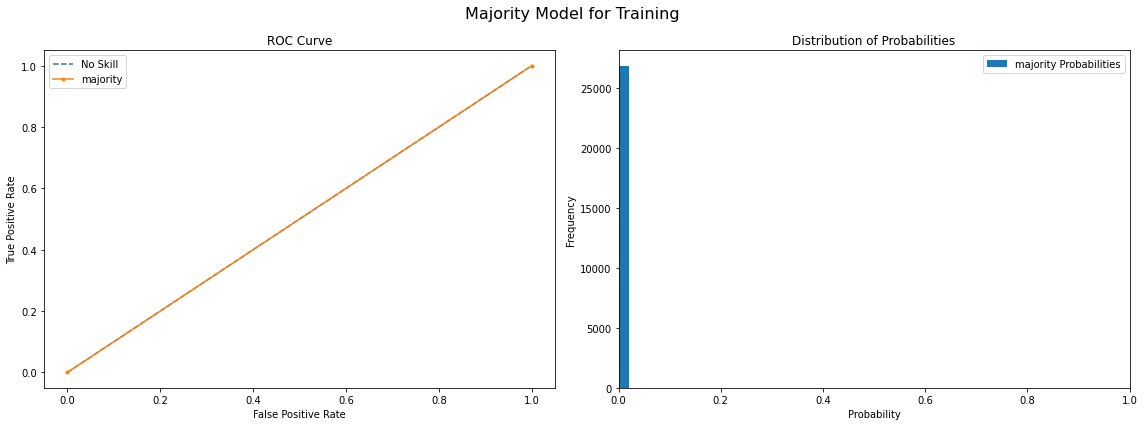

No Skill: ROC AUC=0.500
majority: ROC AUC=0.500


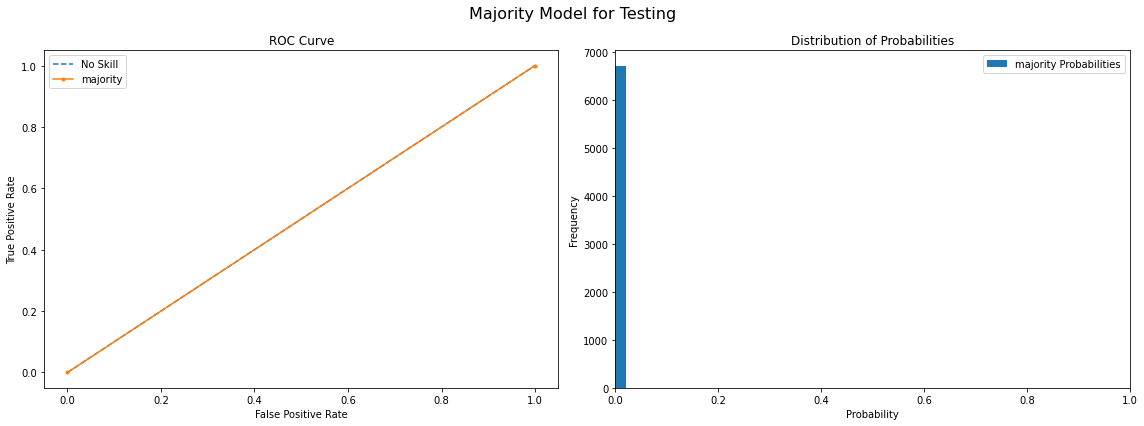

,model,model_type,dataset,accuracy,balanced_accuracy,precision,recall,f1,log_loss,brier,roc_auc
0,majority,,train,0.899538,0.5,0.0,0.0,0.0,3.469849,0.100462,0.5
1,majority,,test,0.901850,0.5,0.0,0.0,0.0,3.389993,0.098150,0.5


In [14]:
from evaluate_model import EvaluateModel
majority_scores, _ = EvaluateModel(
    model=None,
    X_train=y_train,
    X_test=y_test,
    y_train=y_train,
    y_test=y_test,
    model_name="majority",
    model_type="",
).run()
majority_scores

## Baseline

### Full

In [15]:
from sklearn.linear_model import LogisticRegression
lg_full = LogisticRegression(max_iter=1000, penalty="l2", solver="saga", random_state=42)
# lg_full = LogisticRegression(max_iter=1000, penalty="elasticnet", solver="saga", l1_ratio=0.5, random_state=42)
lg_full.fit(X_train_enc, y_train)

/opt/software/hadoop/python36/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(max_iter=1000, random_state=42, solver='saga')

/opt/software/hadoop/python36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/software/hadoop/python36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


No Skill: ROC AUC=0.500
baseline: ROC AUC=0.460


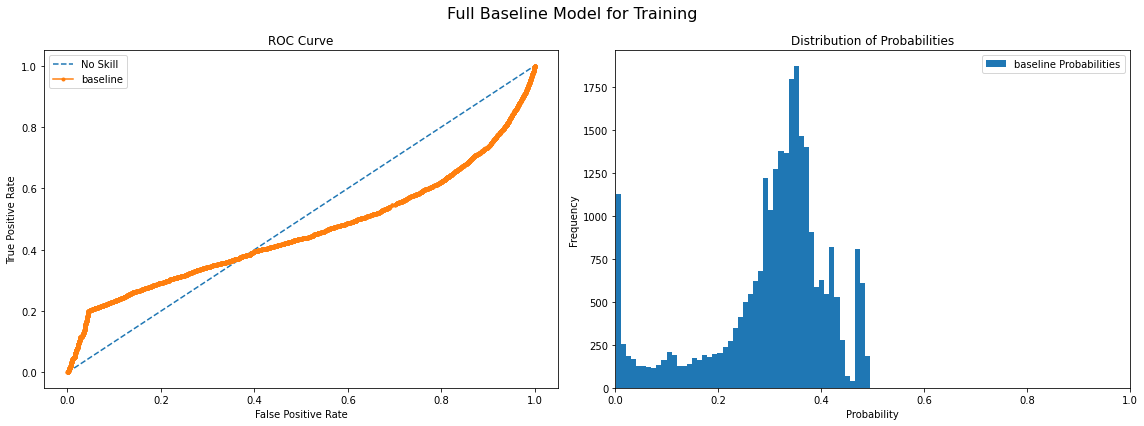

No Skill: ROC AUC=0.500
baseline: ROC AUC=0.435


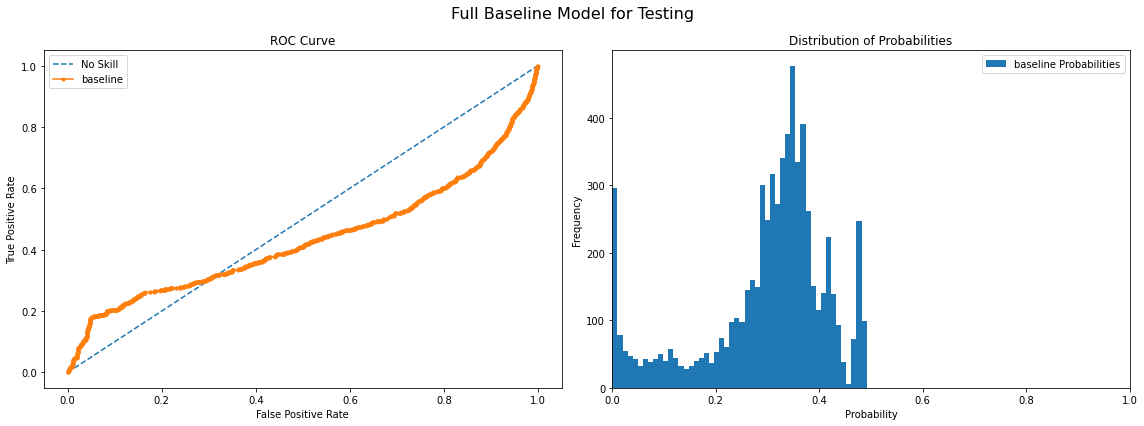

,model,model_type,dataset,accuracy,balanced_accuracy,precision,recall,f1,log_loss,brier,roc_auc
0,baseline,full,train,0.899538,0.5,0.0,0.0,0.0,0.551614,0.151297,0.459836
1,baseline,full,test,0.901850,0.5,0.0,0.0,0.0,0.559228,0.151654,0.435167


In [16]:
baseline_scores, _ = EvaluateModel(
    model=lg_full,
    X_train=X_train_enc,
    X_test=X_test_enc,
    y_train=y_train,
    y_test=y_test,
    model_name="baseline",
    model_type="full",
).run()
baseline_scores

### Binned

In [17]:
lg_bin = LogisticRegression(max_iter=1000, penalty="l2", solver="saga", random_state=42)
lg_bin.fit(X_train_kbins_enc, y_train)

/opt/software/hadoop/python36/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(max_iter=1000, random_state=42, solver='saga')

No Skill: ROC AUC=0.500
baseline: ROC AUC=0.763


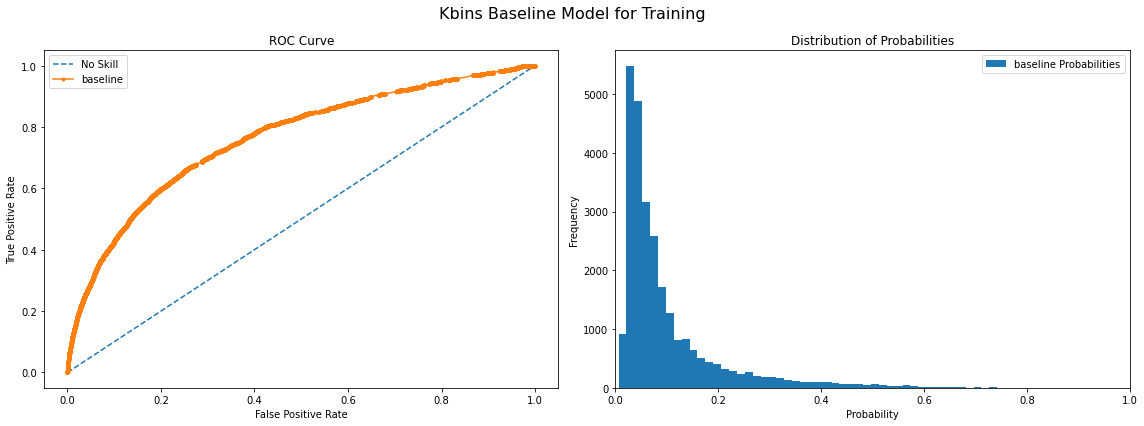

No Skill: ROC AUC=0.500
baseline: ROC AUC=0.765


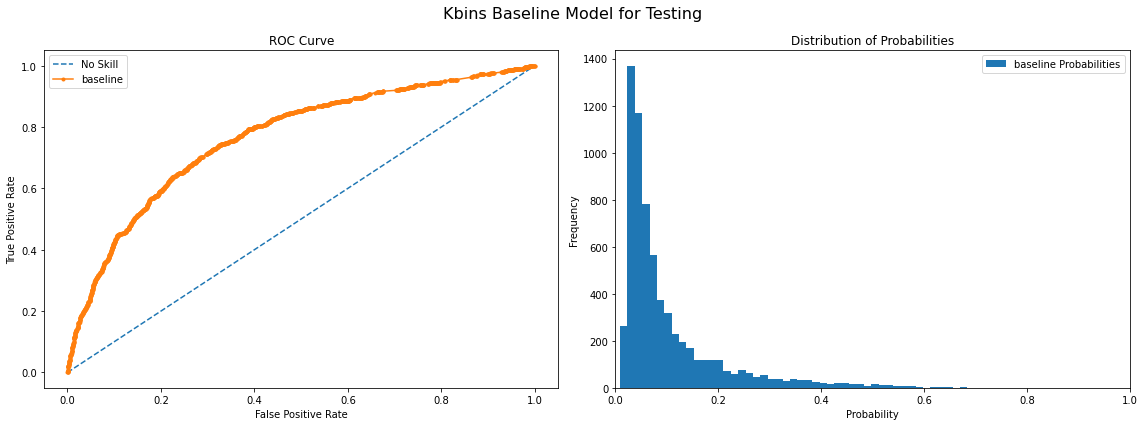

,model,model_type,dataset,accuracy,balanced_accuracy,precision,recall,f1,log_loss,brier,roc_auc
0,baseline,kbins,train,0.901812,0.534898,0.587896,0.075724,0.134166,0.279545,0.079259,0.763131
1,baseline,kbins,test,0.901253,0.524725,0.474359,0.056231,0.100543,0.278278,0.079322,0.765369


In [18]:
baseline_bin_scores, _ = EvaluateModel(
    model=lg_bin,
    X_train=X_train_kbins_enc,
    X_test=X_test_kbins_enc,
    y_train=y_train,
    y_test=y_test,
    model_name="baseline",
    model_type="kbins",
).run()
baseline_bin_scores

## Random Forest

### Full

In [19]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

grid_params = {
    "n_estimators": np.arange(50, 500, 50),
    "max_depth": np.arange(5, 50, 5).tolist(),
    "max_features": ["sqrt", "log2", None],
    "min_samples_leaf": [5, 10, 15, 20],
    "min_samples_split": [5, 10, 15, 20],
    "bootstrap": [True, False],
    "criterion": ["gini", "entropy"],
}
grid_params["max_depth"].extend([None])
                    
rfc_full = RandomForestClassifier(class_weight="balanced", random_state=42) #balanced_subsample, balanced
rfc_full_search = RandomizedSearchCV(
    estimator=rfc_full,
    param_distributions=grid_params,
    n_iter=100,
    scoring="recall", #"neg_log_loss", roc_auc, recall, balanced_accuracy, f1
    cv=3,
    random_state=42,
    n_jobs=-1,
)
rfc_full_search.fit(X_train_enc, y_train)

CPU times: user 10.2 s, sys: 718 ms, total: 10.9 s
Wall time: 2min 5s


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 15, 20, 25, 30, 35,
                                                      40, 45, None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [5, 10, 15, 20],
                                        'min_samples_split': [5, 10, 15, 20],
                                        'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450])},
                   random_state=42, scoring='recall')

In [20]:
rfc_full_search.best_estimator_

RandomForestClassifier(class_weight='balanced', max_depth=5, max_features=None,
                       min_samples_leaf=15, min_samples_split=20,
                       n_estimators=250, random_state=42)

No Skill: ROC AUC=0.500
random forest: ROC AUC=0.765


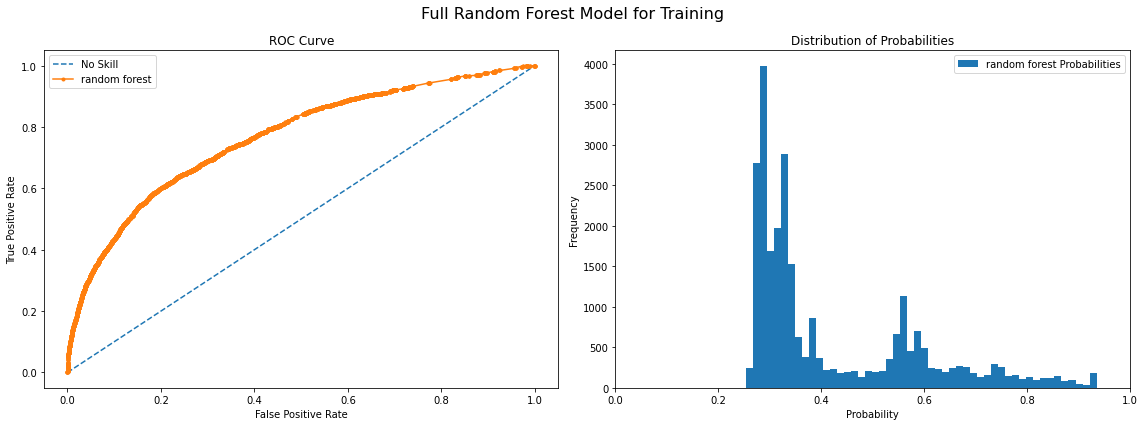

No Skill: ROC AUC=0.500
random forest: ROC AUC=0.756


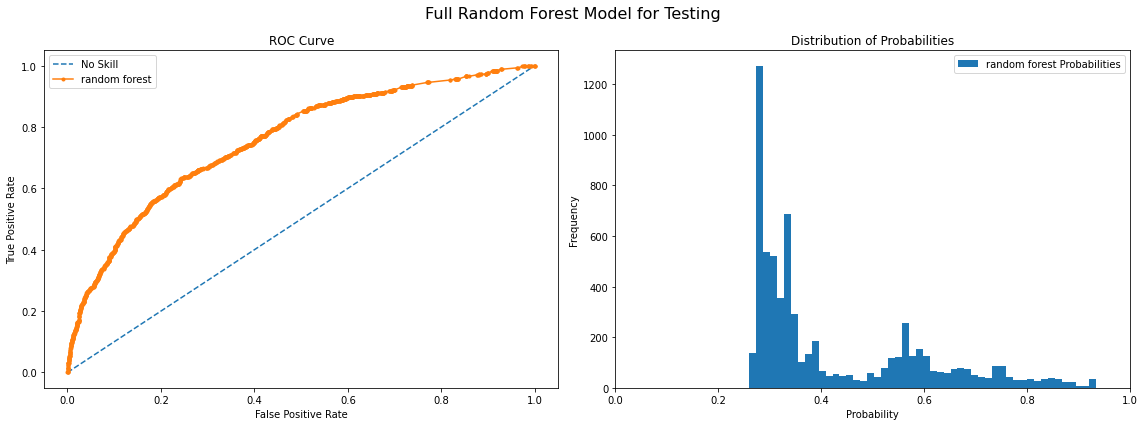

,model,model_type,dataset,accuracy,balanced_accuracy,precision,recall,f1,log_loss,brier,roc_auc
0,random forest,full,train,0.728073,0.695853,0.217220,0.655531,0.326312,0.566962,0.187854,0.765483
1,random forest,full,test,0.713902,0.689017,0.203669,0.658055,0.311063,0.581804,0.194437,0.756349


In [21]:
rfc_scores, _ = EvaluateModel(
    model=rfc_full_search,
    X_train=X_train_enc,
    X_test=X_test_enc,
    y_train=y_train,
    y_test=y_test,
    model_name="random forest",
    model_type="full",
).run()
rfc_scores

### Binned

In [22]:
%%time
rfc_bin = RandomForestClassifier(class_weight="balanced", random_state=42) #balanced_subsample, balanced
rfc_bin_search = RandomizedSearchCV(
    estimator=rfc_bin,
    param_distributions=grid_params,
    n_iter=100,
    scoring="recall",
    cv=3,
    random_state=42,
    n_jobs=-1,
)
rfc_bin_search.fit(X_train_kbins_enc, y_train)

CPU times: user 7.65 s, sys: 158 ms, total: 7.8 s
Wall time: 1min 46s


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 15, 20, 25, 30, 35,
                                                      40, 45, None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [5, 10, 15, 20],
                                        'min_samples_split': [5, 10, 15, 20],
                                        'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450])},
                   random_state=42, scoring='recall')

In [23]:
rfc_bin_search.best_estimator_

RandomForestClassifier(bootstrap=False, class_weight='balanced',
                       criterion='entropy', max_depth=10, max_features='sqrt',
                       min_samples_leaf=5, min_samples_split=15,
                       n_estimators=400, random_state=42)

No Skill: ROC AUC=0.500
random forest: ROC AUC=0.787


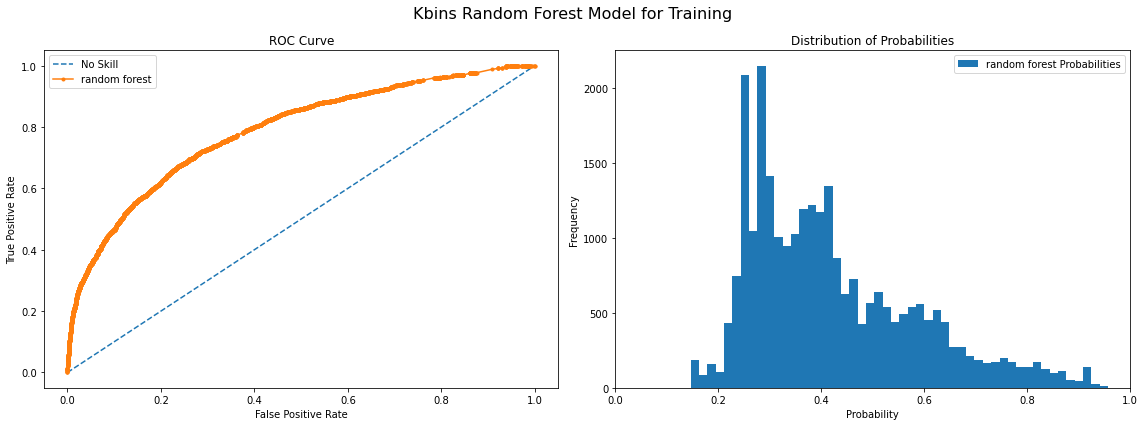

No Skill: ROC AUC=0.500
random forest: ROC AUC=0.757


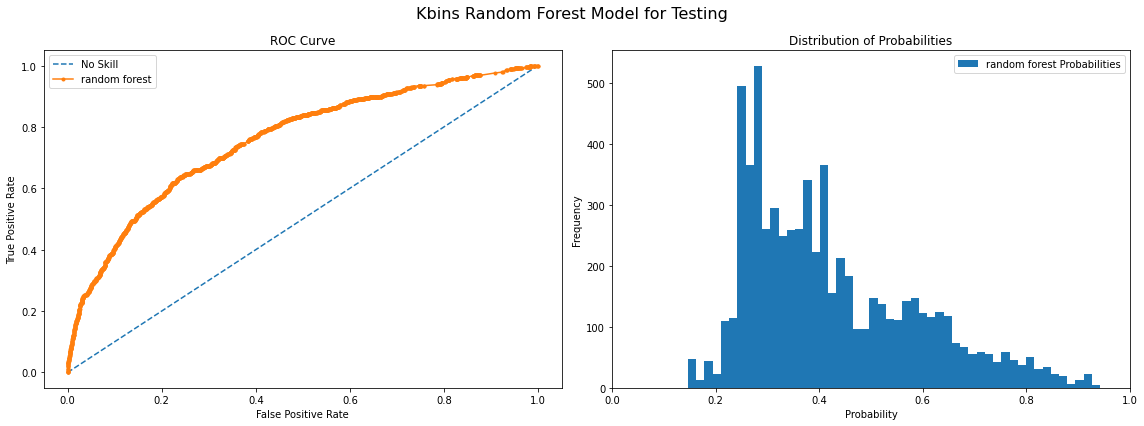

,model,model_type,dataset,accuracy,balanced_accuracy,precision,recall,f1,log_loss,brier,roc_auc
0,random forest,kbins,train,0.755146,0.716507,0.240899,0.668151,0.354122,0.555378,0.184010,0.786671
1,random forest,kbins,test,0.738962,0.698171,0.219136,0.647416,0.327440,0.571144,0.191016,0.756644


In [24]:
rfc_bin_scores, _ = EvaluateModel(
    model=rfc_bin_search,
    X_train=X_train_kbins_enc,
    X_test=X_test_kbins_enc,
    y_train=y_train,
    y_test=y_test,
    model_name="random forest",
    model_type="kbins",
).run()
rfc_bin_scores

## XGBoost

### Full

In [25]:
%%time
from xgboost import XGBClassifier

grid_params = {
    "n_estimators": np.arange(50, 500, 50),
    "learning_rate" : [0.01, 0.05, 0.10, 0.15, 0.20], #[0.05,0.10,0.15,0.20,0.25,0.30]
    "gamma": [0.0, 0.1, 0.2 , 0.3, 0.4],
    "max_depth" : [3, 4, 5, 6, 8, 10, 12, 15],
    "min_child_weight" : [1, 3, 5, 7],
    "colsample_bytree" : [0.3, 0.4, 0.5 , 0.7],
}
# grid_params["max_depth"].extend([None])
                    
xgb_full = XGBClassifier(
    objective="binary:logistic",
    subsample=0.5
)
xgb_search_full = RandomizedSearchCV(
    estimator=xgb_full,
    param_distributions=grid_params,
    n_iter=100,
    scoring="recall", #"neg_log_loss", roc_auc, recall, balanced_accuracy, f1
    cv=3,
    random_state=42,
    n_jobs=-1,
)
xgb_search_full.fit(X_train_enc, y_train)

CPU times: user 26.1 s, sys: 163 ms, total: 26.3 s
Wall time: 1min 56s


RandomizedSearchCV(cv=3, estimator=XGBClassifier(subsample=0.5), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.15,
                                                          0.2],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7],
                                        'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450])},
                   random_state=42, scoring='recall')

In [26]:
xgb_search_full.best_estimator_

XGBClassifier(colsample_bytree=0.4, gamma=0.0, learning_rate=0.15, max_depth=15,
              n_estimators=350, subsample=0.5)

No Skill: ROC AUC=0.500
xgboost: ROC AUC=0.989


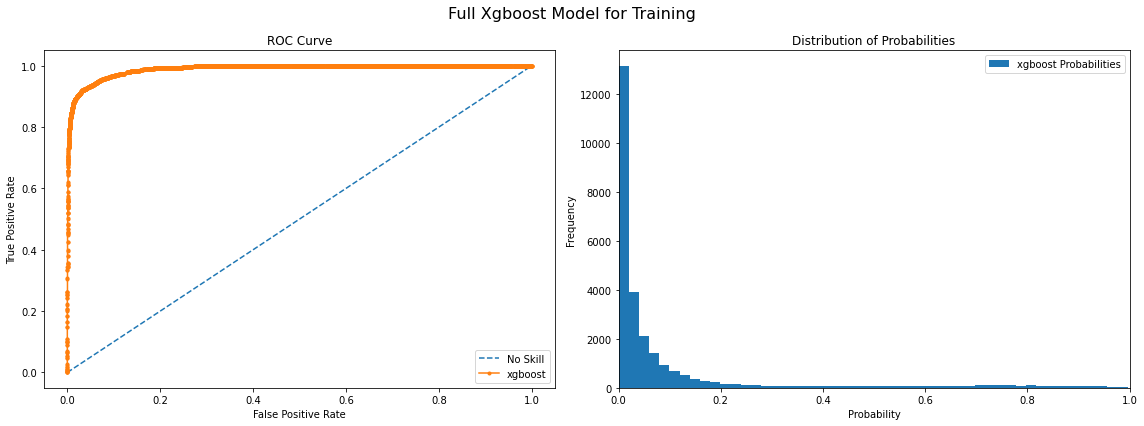

No Skill: ROC AUC=0.500
xgboost: ROC AUC=0.708


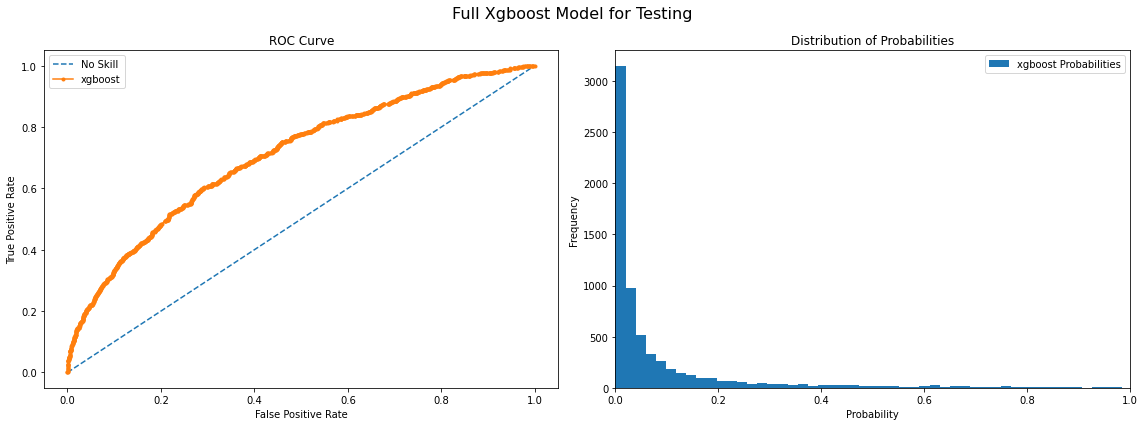

,model,model_type,dataset,accuracy,balanced_accuracy,precision,recall,f1,log_loss,brier,roc_auc
0,xgboost,full,train,0.969160,0.856073,0.970751,0.714551,0.823177,0.101259,0.025719,0.988797
1,xgboost,full,test,0.892303,0.568520,0.386525,0.165653,0.231915,0.340922,0.089234,0.707588


In [27]:
xgb_scores, _ = EvaluateModel(
    model=xgb_search_full,
    X_train=X_train_enc,
    X_test=X_test_enc,
    y_train=y_train,
    y_test=y_test,
    model_name="xgboost",
    model_type="full",
).run()
xgb_scores

### Binned

In [28]:
%%time
xgb_bin = XGBClassifier(
    objective="binary:logistic",
    subsample=0.5
)
xgb_search_bin = RandomizedSearchCV(
    estimator=xgb_bin,
    param_distributions=grid_params,
    n_iter=100,
    scoring="recall",
    cv=3,
    random_state=42,
    n_jobs=-1,
)
xgb_search_bin.fit(X_train_kbins_enc, y_train)

KeyboardInterrupt: 

In [29]:
xgb_search_bin.best_estimator_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_estimator_'

In [ ]:
xgb_bin_scores, _ = EvaluateModel(
    model=xgb_search_bin,
    X_train=X_train_kbins_enc,
    X_test=X_test_kbins_enc,
    y_train=y_train,
    y_test=y_test,
    model_name="xgboost",
    model_type="kbins",
).run()
xgb_bin_scores

## Catboost

### Prep

In [ ]:
# X_train_encodings = X_train_base.copy(deep=True)
# X_test_encodings = X_test_base.copy(deep=True)
# X_train_kbins_encodings = X_train_kbins_base.copy(deep=True)
# X_test_kbins_encodings = X_test_kbins_base.copy(deep=True)
# X_train_top_encodings= X_train_base.loc[:, top_feats].copy(deep=True)
# X_test_top_encodings = X_test_base.loc[:, top_feats].copy(deep=True)

# from glob import glob
# encoder_input_folder = Path(output_folder) / "01_Initial_Data_Prep"

# def check_feat_exists(feat, cols):
#     return feat in cols

# import pickle
# def load_pickle(file):
#     with open(file, 'rb') as f:
#         data = pickle.load(f)
    
#     return data

# import json
# def load_json(file):
#     with open(file, 'r') as f:
#         data = json.load(f)
    
#     return data

# cat_features = []

# files = glob(f"{encoder_input_folder}/encoder_*") + glob(f"{encoder_input_folder}/manual_encodings*")
# for f in files:
#     feat = f.replace(str(encoder_input_folder) + "/", "")
#     if f.endswith(".pkl"):
#         feat = feat.replace(".pkl", "")
#         if check_feat_exists(feat, X_train_encodings.columns):
#             encoder = load_pickle(f)
#             print("TODO: check applied")
#             # print(feat, encoder.classes_)
#             # X_train_encodings[feat] = encoder.inverse_transform(X_train_encodings[feat])
#             # X_test_encodings
#             # X_train_kbins_encodings
#             # X_test_kbins_encodings
#             # cat_features.append(feat)
#         if check_feat_exists(feat, X_train_top_encodings.columns):
#             print("TODO: check applied")
#             # encoder already loaded
#             # X_train_top_encodings[feat] = encoder.inverse_transform(X_train_encodings[feat])
#             # X_test_top_encodings
#     elif f.endswith(".json"):
#         feat = feat.replace(".json", "")
#         json_encodings = load_json(f)
#         for k, v in json_encodings.items():
#             if check_feat_exists(k, X_train_encodings.columns):
#                 print(f"{k} json encoding applied")
#                 inv_dict = {v2: k2 for k2, v2 in v.items()}
#                 X_train_encodings[k] = X_train_encodings[k].map(inv_dict)
#                 X_test_encodings[k] = X_test_encodings[k].map(inv_dict)
#                 X_train_kbins_encodings[k] = X_train_kbins_encodings[k].map(inv_dict)
#                 X_test_kbins_encodings[k] = X_test_kbins_encodings[k].map(inv_dict)
#                 cat_features.append(k)
#             if check_feat_exists(k, X_train_top_encodings.columns):
#                 print(f"{k} json encoding top features applied")
#                 X_train_top_encodings[k] = X_train_top_encodings[k].map(inv_dict)
#                 X_test_top_encodings[k] = X_test_top_encodings[k].map(inv_dict)
#     else:
#         print(f"missing file type for {feat}")


# X_train_encodings = X_train_encodings.iloc[:, 3:]
# X_test_encodings = X_test_encodings.iloc[:, 3:]
# X_train_kbins_encodings = pd.DataFrame(X_train_kbins_encodings, columns = X_train_kbins_base.columns[3:])
# X_test_kbins_encodings = pd.DataFrame(X_test_kbins_encodings, columns = X_train_kbins_base.columns[3:])
# X_train_top_encodings = X_train_top_encodings.iloc[:, 3:]
# X_test_top_encodings = X_test_top_encodings.iloc[:, 3:]

### Full

In [ ]:
%%time
# TODO: make this a class or as part of training function

from catboost import CatBoostClassifier, Pool
from sklearn.utils.class_weight import compute_class_weight
# from catboost import randomized_search # not supported in installed version


def get_class_weights(y_train):
    classes = np.unique(y_train)
    weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
    class_weights = dict(zip(classes, weights))
    return class_weights


grid_params = {
    "iterations": np.arange(50, 500, 50),
    "learning_rate" : [0.01, 0.05, 0.10, 0.15, 0.20],
    "l2_leaf_reg": [0.01, 0.1, 1, 10, 50, 100],
    "depth" : np.arange(5, 50, 5).tolist(),
    "subsample": [0.6, 0.7, 0.8, 0.9, 1.0],
    "colsample_bylevel" : [0.3, 0.4, 0.5 , 0.7],
}

cat_class_weights = get_class_weights(y_train)

cat_full = CatBoostClassifier(
    cat_features=cat_cols,
    class_weights=cat_class_weights,
    loss_function="Logloss", # Logloss, CrossEntropy, Precision, Recall, F, F1, BalancedAccuracy, AUC
    eval_metric="AUC",
    verbose=False,
)
cat_full_search = RandomizedSearchCV(
    estimator=cat_full,
    param_distributions=grid_params,
    n_iter=100,
    cv=3,
    random_state=42,
    n_jobs=-1,
)

cat_full_search.fit(X_train_cat, y_train)

/opt/software/hadoop/python36/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


No Skill: ROC AUC=0.500
catboost: ROC AUC=0.794


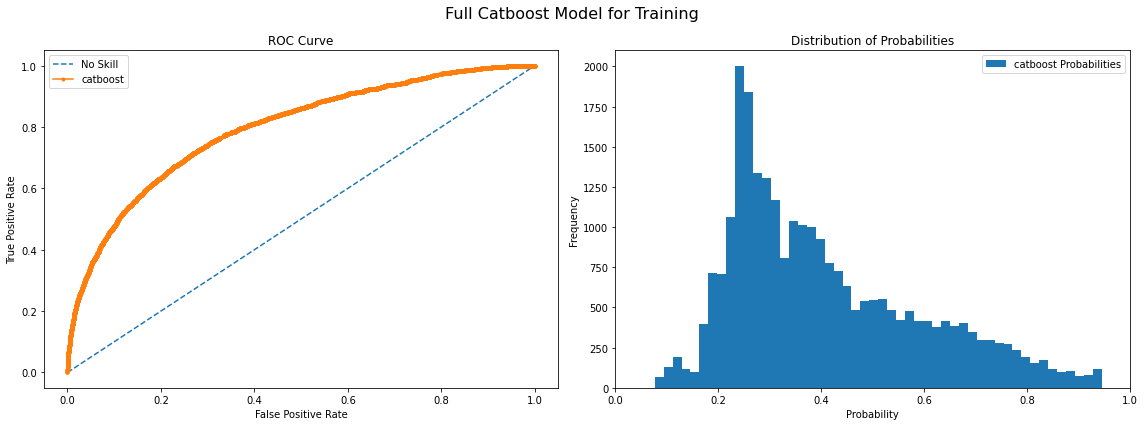

No Skill: ROC AUC=0.500
catboost: ROC AUC=0.770


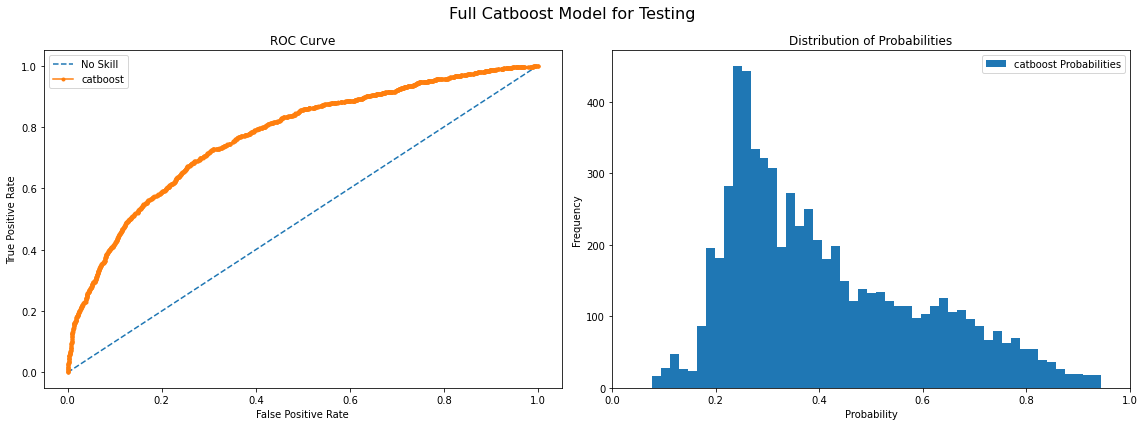

,model,model_type,dataset,accuracy,balanced_accuracy,precision,recall,f1,log_loss,brier,roc_auc
0,catboost,full,train,0.754550,0.720462,0.242175,0.677803,0.356850,0.54359,0.179419,0.793770
1,catboost,full,test,0.739558,0.706628,0.223014,0.665653,0.334096,0.56017,0.186671,0.769903


In [37]:
cat_scores, _ = EvaluateModel(
    model=cat_full_search,
    X_train=X_train_cat,
    X_test=X_test_cat,
    y_train=y_train,
    y_test=y_test,
    model_name="catboost",
    model_type="full",
).run()
cat_scores

### Binned

In [38]:
%%time
cat_bin = CatBoostClassifier(
    cat_features=cat_cols,
    class_weights=cat_class_weights,
    loss_function="Logloss",
    eval_metric="AUC",
    verbose=False,
)
cat_bin_search = RandomizedSearchCV(
    estimator=cat_bin,
    param_distributions=grid_params,
    n_iter=100,
    scoring="recall",
    cv=3,
    random_state=42,
    n_jobs=-1,
)

cat_bin_search.fit(X_train_kbins_cat, y_train)

/opt/software/hadoop/python36/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/opt/software/hadoop/python36/lib/python3.6/site-packages/sklearn/model_selection/_search.py:925: UserWarning: One or more of the test scores are non-finite: [0.19302153 0.62843356 0.58166295        nan        nan        nan
        nan 0.63622866        nan        nan        nan 0.32925019
        nan 0.46250928 0.55827765 0.38455828        nan 0.54046028
 0.46399406        nan        nan        nan        nan 0.33110616
        nan 0.59762435        nan        nan 0.42316258 0.63028953
        nan        nan 0.43207127 0.55902004        nan        nan
 0.52449889 0.39161099        nan        nan 0.63845583        nan
        nan        nan        nan        nan        nan        nan
        nan

CPU times: user 1min 39s, sys: 22.4 s, total: 2min 1s
Wall time: 2h 14min 45s


RandomizedSearchCV(cv=3,
                   estimator=<catboost.core.CatBoostClassifier object at 0x7fd0991a8ba8>,
                   n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bylevel': [0.3, 0.4, 0.5,
                                                              0.7],
                                        'depth': [5, 10, 15, 20, 25, 30, 35, 40,
                                                  45],
                                        'iterations': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450]),
                                        'l2_leaf_reg': [0.01, 0.1, 1, 10, 50,
                                                        100],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.15,
                                                          0.2],
                                        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]},
                   random_state=42, scoring='recall')

No Skill: ROC AUC=0.500
catboost: ROC AUC=0.790


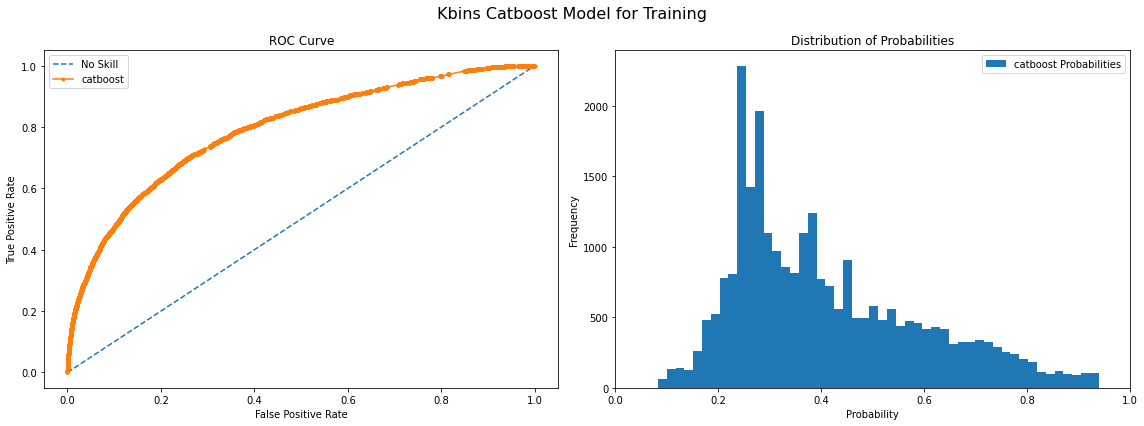

No Skill: ROC AUC=0.500
catboost: ROC AUC=0.769


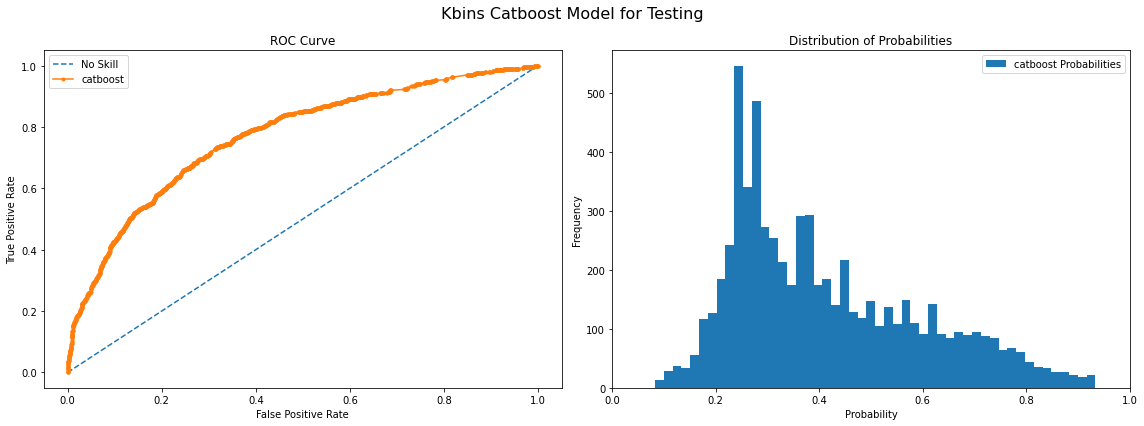

,model,model_type,dataset,accuracy,balanced_accuracy,precision,recall,f1,log_loss,brier,roc_auc
0,catboost,kbins,train,0.752871,0.719529,0.240738,0.677803,0.355287,0.545887,0.180469,0.790385
1,catboost,kbins,test,0.738813,0.705537,0.222166,0.664134,0.332952,0.559844,0.186615,0.769395


In [39]:
cat_bin_scores, _ = EvaluateModel(
    model=cat_bin_search,
    X_train=X_train_kbins_cat,
    X_test=X_test_kbins_cat,
    y_train=y_train,
    y_test=y_test,
    model_name="catboost",
    model_type="kbins",
).run()
cat_bin_scores

## Model Comparison

In [40]:
model_scores = pd.concat(
    [
        majority_scores,
        baseline_scores,
        baseline_bin_scores,
        rfc_scores,
        rfc_bin_scores,
        xgb_scores,
        xgb_bin_scores,
        cat_scores,
        cat_bin_scores,
    ],
    axis=0,
)
model_scores

,model,model_type,dataset,accuracy,balanced_accuracy,precision,recall,f1,log_loss,brier,roc_auc
0,majority,,train,0.899538,0.500000,0.000000,0.000000,0.000000,3.469849,0.100462,0.500000
1,majority,,test,0.901850,0.500000,0.000000,0.000000,0.000000,3.389993,0.098150,0.500000
0,baseline,full,train,0.899538,0.500000,0.000000,0.000000,0.000000,0.551614,0.151297,0.459836
1,baseline,full,test,0.901850,0.500000,0.000000,0.000000,0.000000,0.559228,0.151654,0.435167
0,baseline,kbins,train,0.901812,0.534898,0.587896,0.075724,0.134166,0.279545,0.079259,0.763131
1,baseline,kbins,test,0.901253,0.524725,0.474359,0.056231,0.100543,0.278278,0.079322,0.765369
0,random forest,full,train,0.728073,0.695853,0.217220,0.655531,0.326312,0.566962,0.187854,0.765483
1,random forest,full,test,0.713902,0.689017,0.203669,0.658055,0.311063,0.581804,0.194437,0.756349
0,random forest,kbins,train,0.755146,0.716507,0.240899,0.668151,0.354122,0.555378,0.184010,0.786671
1,random forest,kbins,test,0.738962,0.698171,0.219136,0.647416,0.327440,0.571144,0.191016,0.756644


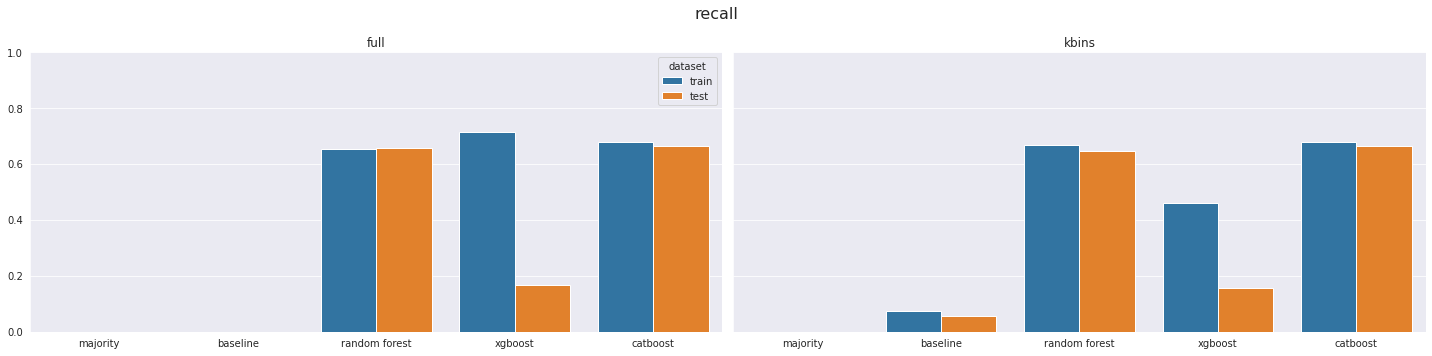

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")


def plot_model_comp(df, metric, n_rows, n_cols):
    model_types = list(set(df[df.model != "majority"].model_type))

    fig, ax = plt.subplots(n_rows,n_cols,figsize=(n_cols*10,n_rows*5), sharex=True, sharey=True)
    i = 0
    for j in range(n_rows):
        for k in range(n_cols):
            sns.barplot(
                data=df[(df.model == "majority") | (df.model_type == model_types[i])],
                order=list(df.model.unique()),
                x="model",
                y=metric,
                hue="dataset",
                # ax=ax[j,k],
                ax=ax[k],
            )
            # ax[j,k].set_title(model_types[i])
            ax[k].set_title(model_types[i])
            # if ax[j,k] != ax[0,0]:
                # ax[j,k].get_legend().remove()
            if ax[k] != ax[0]:
                ax[k].get_legend().remove()
            # ax[j,k].set_ylabel("")
            ax[k].set_ylabel("")
            # ax[j,k].set_xlabel("")
            ax[k].set_xlabel("")
            i += 1
    if metric in ["accuracy", "balanced_accuracy", "recall", "precision", "f1"]:
        # ax[0,0].set_ylim(0,1)
        ax[0].set_ylim(0,1)
    plt.suptitle(metric, fontsize=16)
    plt.tight_layout()
    plt.show()

plot_model_comp(model_scores, "recall", 1, 2)

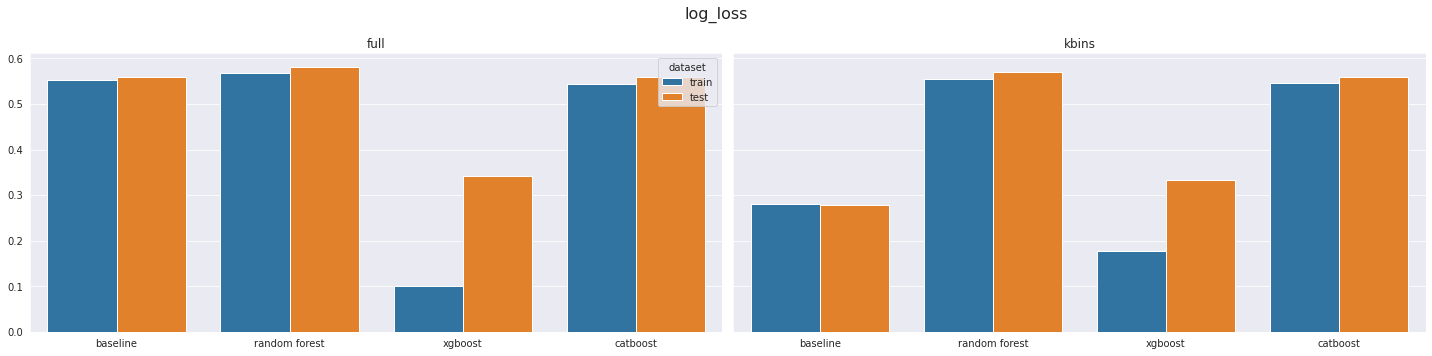

In [42]:
plot_model_comp(model_scores[model_scores.model != "majority"], "log_loss", 1, 2)

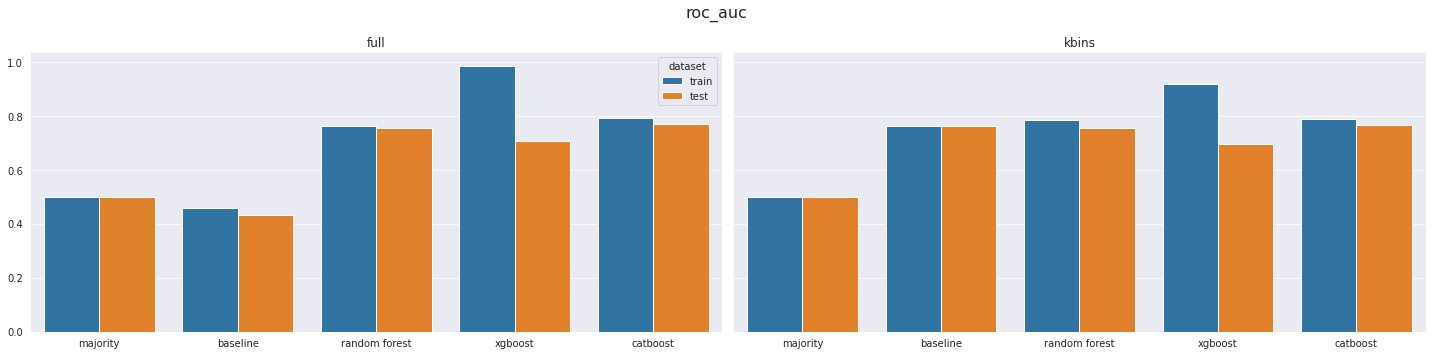

In [43]:
plot_model_comp(model_scores, "roc_auc", 1, 2)

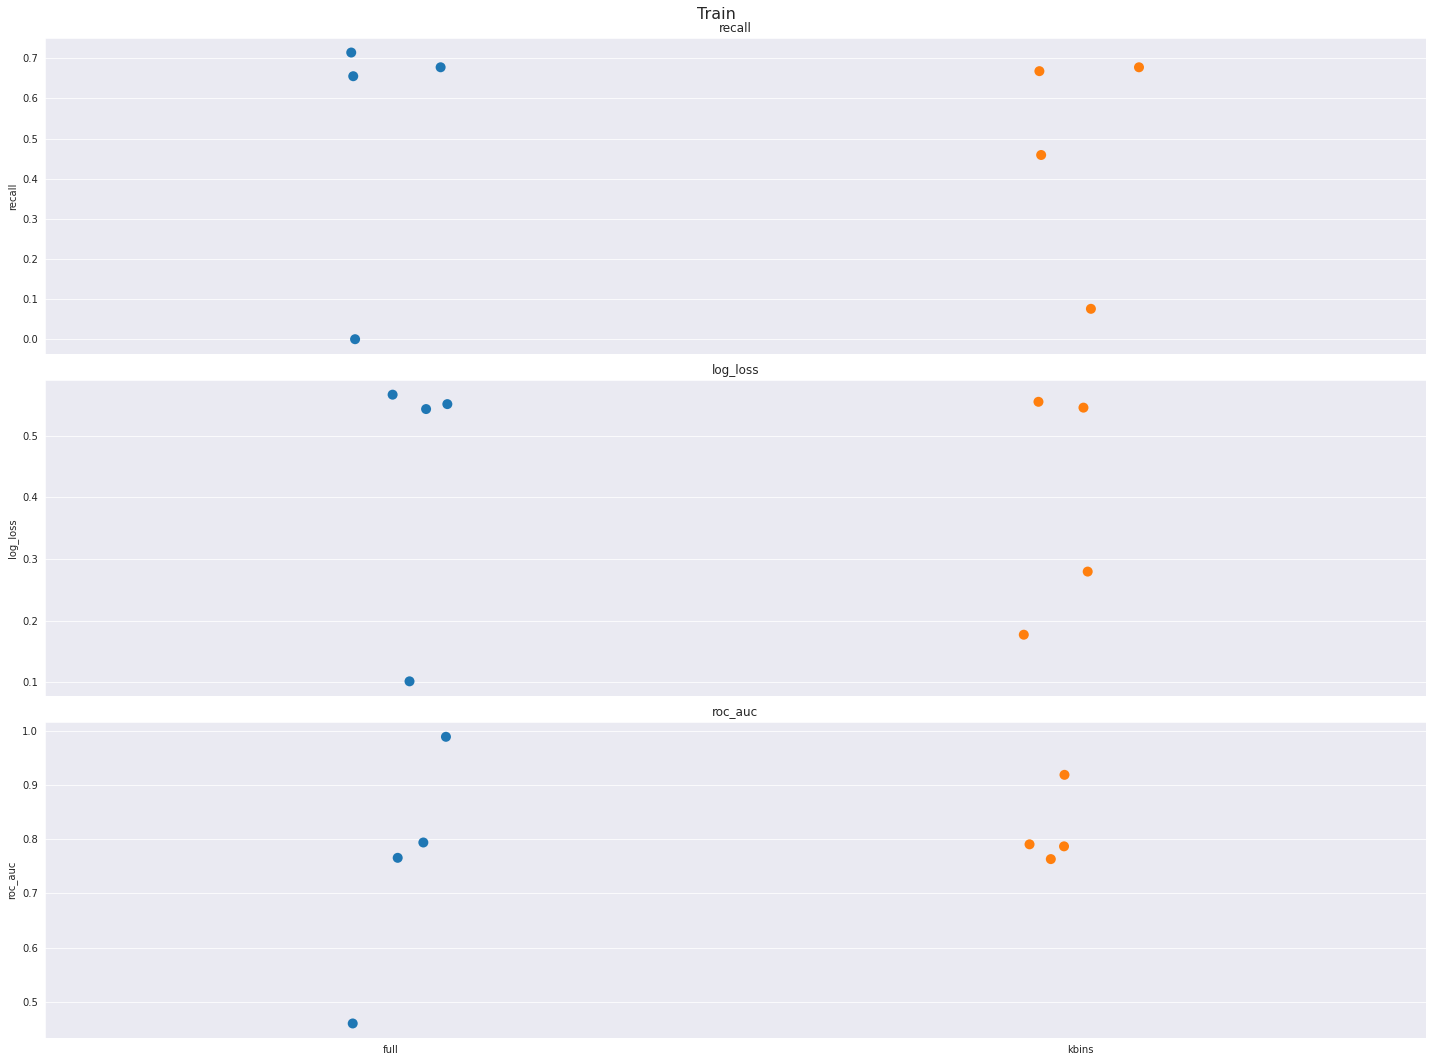

In [44]:
fig, ax = plt.subplots(3, 1, figsize=(20, 15), sharex=True)

score_dict = {0: "recall", 1: "log_loss", 2: "roc_auc"}
for i in range(3):
    sns.stripplot(
        data=model_scores[(model_scores.model_type != "") & (model_scores.dataset == "train")],
        x="model_type",
        y=score_dict[i],
        size=10,
        ax=ax[i],
    )
    ax[i].set_title(score_dict[i])
    ax[i].set_xlabel("")

plt.suptitle("Train", fontsize=16)
plt.tight_layout()
plt.show()

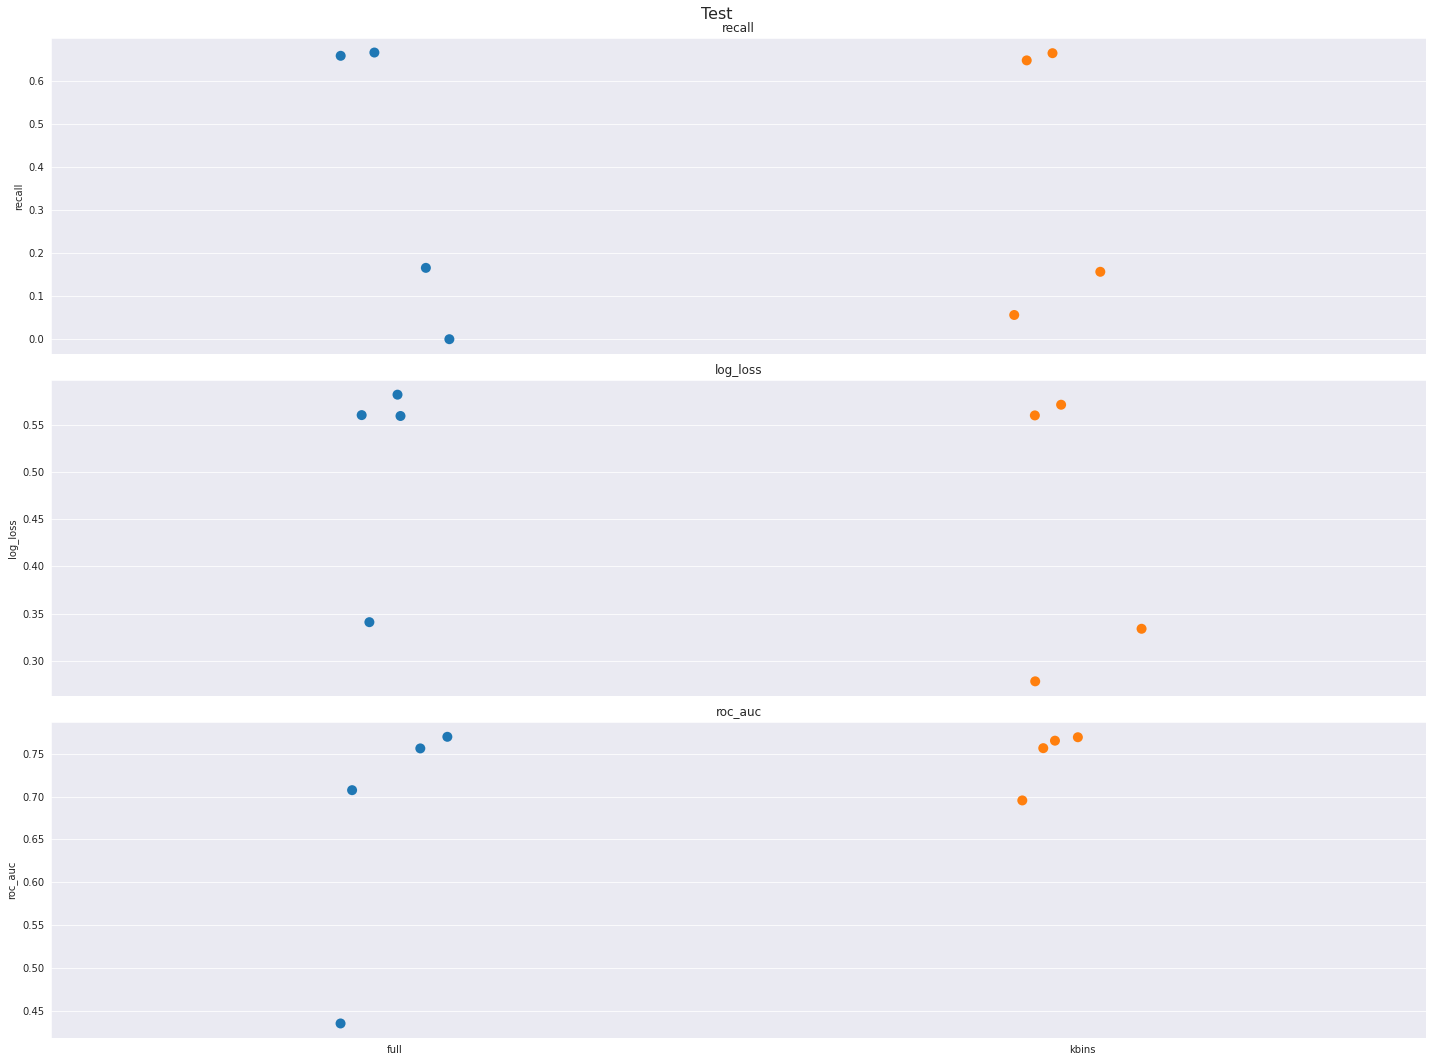

In [45]:
fig, ax = plt.subplots(3, 1, figsize=(20, 15), sharex=True)

score_dict = {0: "recall", 1: "log_loss", 2: "roc_auc"}
for i in range(3):
    sns.stripplot(
        data=model_scores[(model_scores.model_type != "") & (model_scores.dataset == "test")],
        x="model_type",
        y=score_dict[i],
        size=10,
        ax=ax[i],
    )
    ax[i].set_title(score_dict[i])
    ax[i].set_xlabel("")

plt.suptitle("Test", fontsize=16)
plt.tight_layout()
plt.show()


# Interpretability

## Feature Importance

In [48]:
full_feat_importances = pd.DataFrame(data={
    "features": X_train_base.iloc[:, 1:].drop(columns=(drop_cols + cat_cols)).columns,
    "rfc": rfc_full_search.best_estimator_.feature_importances_,
    "xgb": xgb_search_full.best_estimator_.feature_importances_,
#     "cat": cat_bin_search.best_estimator_.feature_importances_ / 100,
})
full_feat_importances.sort_values(by="rfc", ascending=False).head(10)

,features,rfc,xgb
34,branch_count_nominal,0.343894,0.036429
30,location_sales_volume_nominal,0.334825,0.041144
0,work_at_home,0.077345,0.028995
5,in_business_M,0.057669,0.025180
2,primary_naics2_code_id,0.043897,0.025950
32,location_employee_count_nominal,0.041119,0.026124
3,zip_code_adj,0.016354,0.025350
24,physical_state_abbreviation_NE,0.016219,0.024810
1,has_phone_flg,0.015359,0.023172
25,physical_state_abbreviation_NV,0.013099,0.025666


In [49]:
full_feat_importances.sort_values(by="xgb", ascending=False).head(10)

,features,rfc,xgb
13,physical_state_abbreviation_DC,0.005429,0.073324
11,physical_state_abbreviation_CO,0.001440,0.065193
22,physical_state_abbreviation_MO,0.000000,0.057614
30,location_sales_volume_nominal,0.334825,0.041144
34,branch_count_nominal,0.343894,0.036429
20,physical_state_abbreviation_MA,0.000000,0.034551
0,work_at_home,0.077345,0.028995
8,physical_state_abbreviation_AR,0.000682,0.028227
36,num_loc_by_globduns_nominal,0.001549,0.027781
6,in_business_S,0.004570,0.026687


In [50]:
pd.DataFrame(data={
    "features": X_train_cat.columns,
    "cat": cat_full_search.best_estimator_.feature_importances_ / 100,
}).sort_values(by="cat", ascending=False).head(15)

# full_feat_importances.sort_values(by="cat", ascending=False).head(10)

,features,cat
3,physical_state_abbreviation,0.210145
0,work_at_home,0.132893
6,location_sales_volume_nominal,0.132633
13,labels_primary_naics2_code_id,0.107286
1,in_business,0.091679
5,zip_code_adj,0.081141
4,primary_naics2_code_id,0.051059
7,corporate_employee_count_nominal,0.050573
8,location_employee_count_nominal,0.048683
2,has_phone_flg,0.041224


## SHAP

In [51]:
# pip install shap
import shap

def compute_shap(model, X):
    explainer = shap.Explainer(model)
    shap_values = explainer(X)
    shap_importances = shap_values.abs.mean(0).values
    return shap_importances

In [55]:
%%time
rfc_shap = compute_shap(rfc_full_search.best_estimator_, X_test_enc)[:,1]

CPU times: user 7.66 s, sys: 120 ms, total: 7.78 s
Wall time: 7.73 s


In [56]:
%%time
xgb_shap = compute_shap(xgb_search_full.best_estimator_, X_test_enc)

CPU times: user 2min 19s, sys: 362 ms, total: 2min 19s
Wall time: 2min 19s


In [57]:
%%time
cat_shap = compute_shap(cat_full_search.best_estimator_, X_test_cat)

CPU times: user 1min 50s, sys: 775 ms, total: 1min 51s
Wall time: 7.06 s


In [58]:
full_shap_importances = pd.DataFrame(data={
    "features": X_train_base.iloc[:, 1:].drop(columns=(drop_cols + cat_cols)).columns,
    "rfc": rfc_shap,
    "xgb": xgb_shap,
    # "cat": cat_shap,
})
full_shap_importances.sort_values(by="rfc", ascending=False).head(10)

,features,rfc,xgb
30,location_sales_volume_nominal,0.083589,0.954133
34,branch_count_nominal,0.060955,0.094710
0,work_at_home,0.038758,0.331302
5,in_business_M,0.036895,0.145456
2,primary_naics2_code_id,0.012350,0.399487
1,has_phone_flg,0.010419,0.137961
32,location_employee_count_nominal,0.008358,0.262058
25,physical_state_abbreviation_NV,0.004785,0.095551
31,corporate_employee_count_nominal,0.004143,0.231205
3,zip_code_adj,0.004117,0.436315


In [59]:
full_shap_importances.sort_values(by="xgb", ascending=False).head(10)

,features,rfc,xgb
30,location_sales_volume_nominal,0.083589,0.954133
3,zip_code_adj,0.004117,0.436315
2,primary_naics2_code_id,0.012350,0.399487
0,work_at_home,0.038758,0.331302
32,location_employee_count_nominal,0.008358,0.262058
31,corporate_employee_count_nominal,0.004143,0.231205
5,in_business_M,0.036895,0.145456
1,has_phone_flg,0.010419,0.137961
25,physical_state_abbreviation_NV,0.004785,0.095551
34,branch_count_nominal,0.060955,0.094710


In [60]:
pd.DataFrame(data={
    "features": X_train_cat.columns,
    "cat": cat_shap,
}).sort_values(by="cat", ascending=False).head(15)

# full_shap_importances.sort_values(by="cat", ascending=False).head(10)

,features,cat
0,work_at_home,0.220836
6,location_sales_volume_nominal,0.205603
3,physical_state_abbreviation,0.205442
1,in_business,0.143300
13,labels_primary_naics2_code_id,0.107082
2,has_phone_flg,0.095543
8,location_employee_count_nominal,0.061588
7,corporate_employee_count_nominal,0.059049
5,zip_code_adj,0.054520
10,branch_count_nominal,0.051266


## Precision Recall

100%|██████████| 3/3 [02:12<00:00, 44.11s/it]


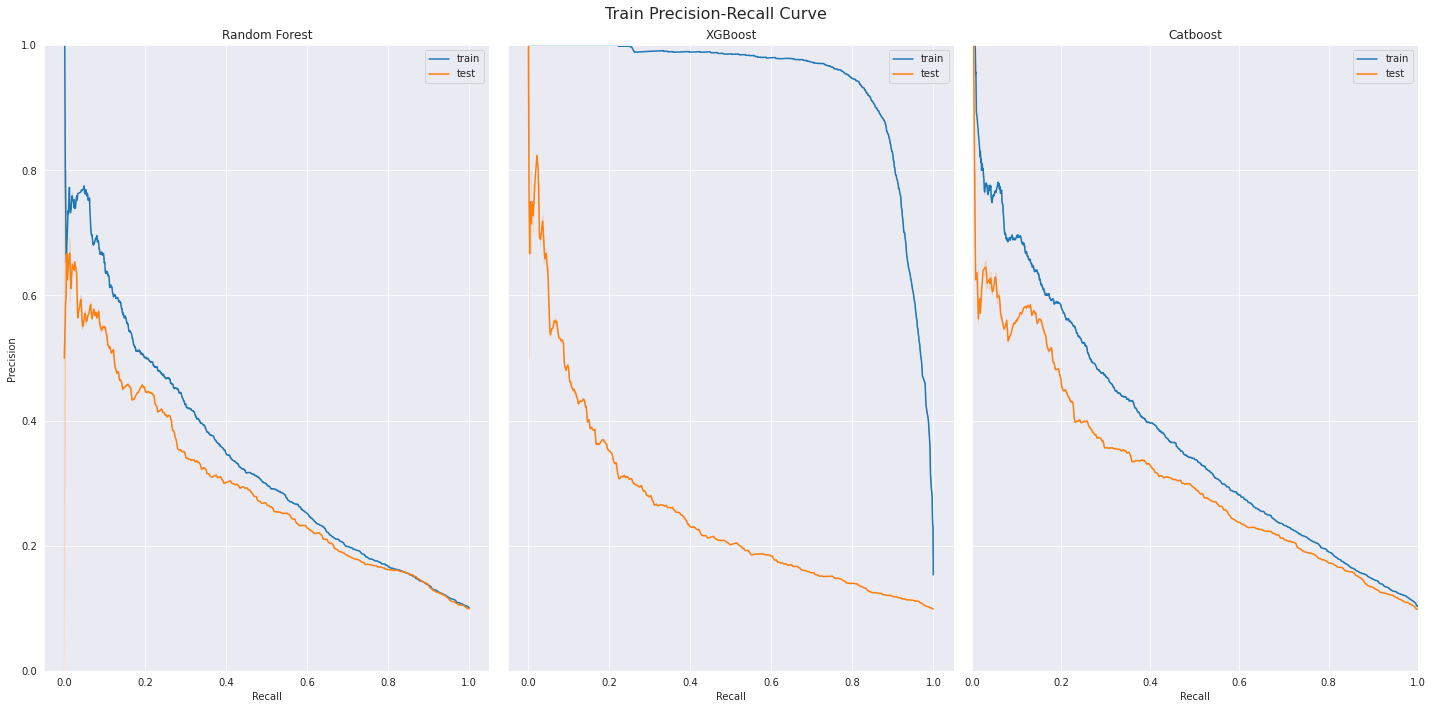

In [63]:
from sklearn.metrics import precision_recall_curve
from tqdm import tqdm

fig, ax = plt.subplots(1, 3, figsize=(20, 10), sharey=True)

model_dict = {
    0: {"model": rfc_full_search, "X_train": X_train_enc, "X_test": X_test_enc, "name": "Random Forest"},
    1: {"model": xgb_search_full, "X_train": X_train_enc, "X_test": X_test_enc, "name": "XGBoost"},
    2: {"model": cat_full_search, "X_train": X_train_cat, "X_test": X_test_cat, "name": "Catboost"},
}
for i in tqdm(range(3)):
    for d in ["X_train", "X_test"]:
        model = model_dict[i].get("model")
        X = model_dict[i].get(d)
        y = y_train if "train" in d else y_test
        label = "train" if "train" in d else "test"

        precision, recall, thresholds = precision_recall_curve(y, model.predict_proba(X)[:, 1])
        # ax[i].fill_between(recall, precision)
        sns.lineplot(x=recall, y=precision, ax=ax[i], label=label)
        ax[i].set_ylabel("Precision")
        ax[i].set_xlabel("Recall")
        ax[i].set_title(model_dict[i].get("name"))
        
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.suptitle("Train Precision-Recall Curve", fontsize=16)
plt.tight_layout()
plt.show()

## K-S Chart

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp

def ks_chart(probs, y):

    class0 = y[y == 0]
    class1 = y[y == 1]
    prob0 = probs[:,0]
    prob1 = probs[:,1]
    
    ks = ks_2samp(prob0, prob1)
    
    prob0 = np.sort(prob0)
    prob1 = np.sort(prob1)
    prob0_cdf = np.cumsum(prob0)
    prob1_cdf = np.cumsum(prob1)
    prob0_cdf = prob0_cdf / prob0_cdf[-1]
    prob1_cdf = prob1_cdf / prob1_cdf[-1]
    
    ks_statistic = ks.statistic
    
    # Plot
    plt.figure(figsize=(8, 6))
    sns.lineplot(x=prob0, y=prob0_cdf, label="prob0")
    sns.lineplot(x=prob1, y=prob1_cdf, label="prob1")
    plt.xlabel("Probabilities")
    plt.ylabel("CDF")
    plt.title(f"Kolmogorov-Smirnov Chart\nKS Statistic: {ks_statistic:.4f}")
    
    plt.show()

### Random Forest

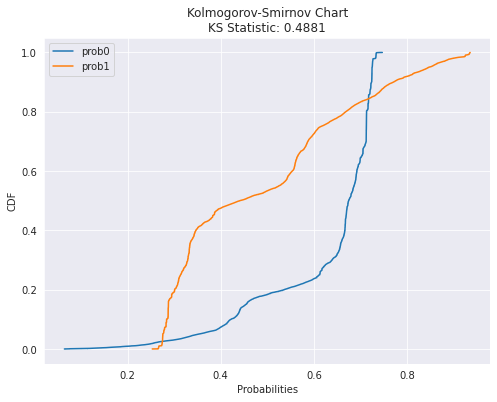

In [66]:
ks_chart(rfc_full_search.predict_proba(X_train_enc), y_train)

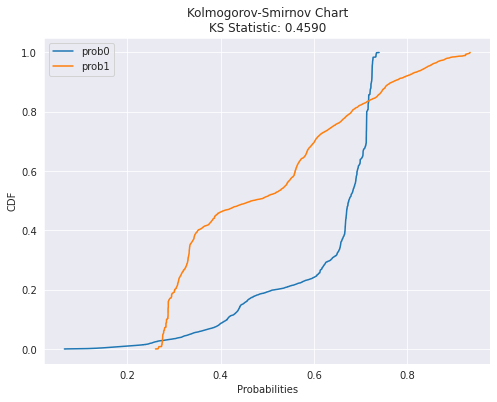

In [67]:
ks_chart(rfc_full_search.predict_proba(X_test_enc), y_test)

### XGBoost

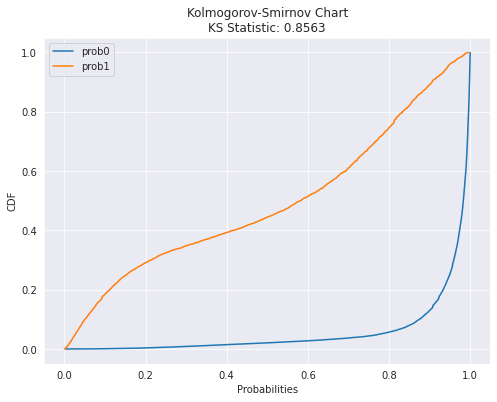

In [68]:
ks_chart(xgb_search_full.predict_proba(X_train_enc), y_train)

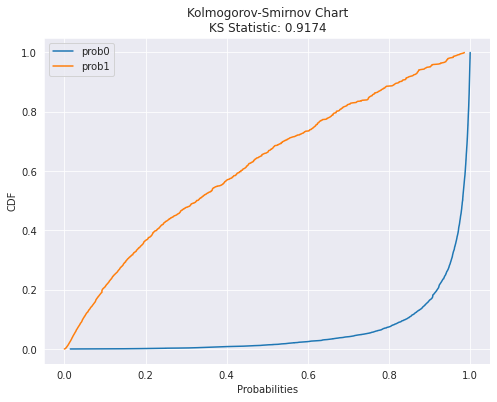

In [69]:
ks_chart(xgb_search_full.predict_proba(X_test_enc), y_test)

### Catboost

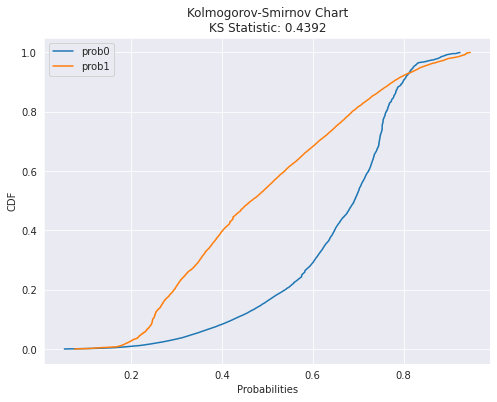

In [70]:
ks_chart(cat_full_search.predict_proba(X_train_cat), y_train)

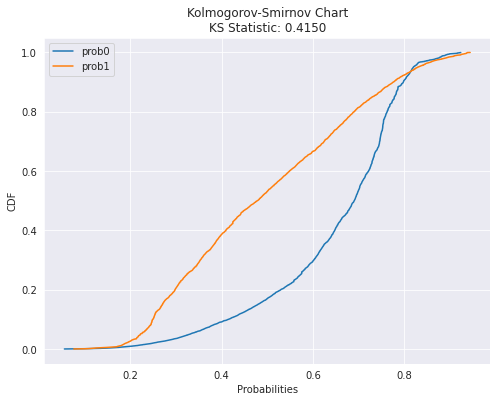

In [71]:
ks_chart(cat_full_search.predict_proba(X_test_cat), y_test)

### Cumulative Gain

In [72]:
def cumulative_gain_chart(y_true, y_scores, figsize=(8, 6)):
    """
    Create a Cumulative Gain chart for a given set of true labels and predicted scores.

    Parameters:
        y_true (array-like): True labels (0 or 1).
        y_scores (array-like): Predicted probabilities or scores.
        figsize (tuple, optional): Figure size for the plot. Defaults to (8, 6).

    Returns:
        None: The function displays the Cumulative Gain chart using Matplotlib.
    """
    # Calculate cumulative gain
    sorted_indices = np.argsort(y_scores)[::-1]
    sorted_y_true = y_true[sorted_indices]
    cumulative_gain = np.cumsum(sorted_y_true) / np.sum(y_true)

    # Plot cumulative gain curve
    plt.figure(figsize=figsize)
    plt.plot(np.arange(1, len(y_true) + 1), cumulative_gain, linestyle='-', color='b', label='Cumulative Gain')
    plt.plot([1, len(y_true)], [0, 1], linestyle='--', color='gray', label='Random')
    plt.xlabel('Number of Samples')
    plt.ylabel('Cumulative Gain')
    plt.title('Cumulative Gain Chart')
    plt.legend()
    plt.grid(True)
    plt.show()

## Random Forest

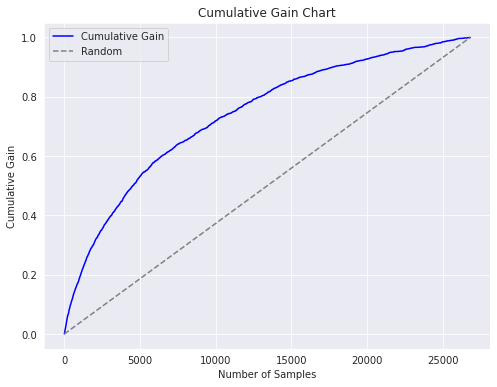

In [73]:
cumulative_gain_chart(y_train, rfc_full_search.predict_proba(X_train_enc)[:,1])

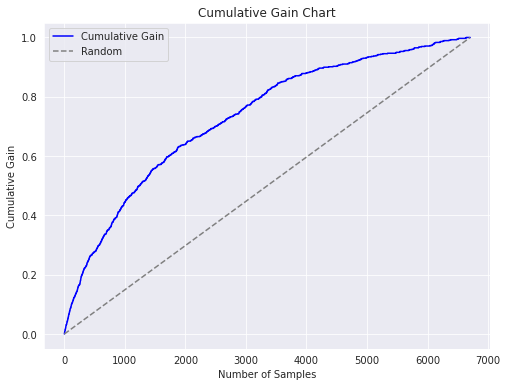

In [74]:
cumulative_gain_chart(y_test, rfc_full_search.predict_proba(X_test_enc)[:,1])

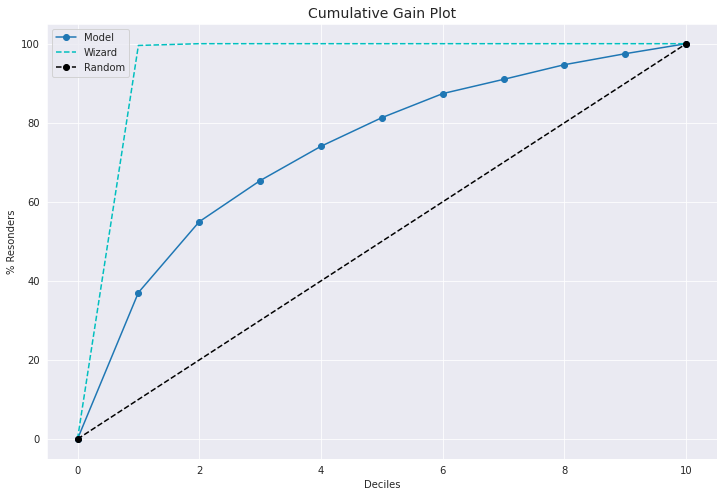

In [75]:
# https://github.com/tensorbored/kds/blob/master/kds/metrics.py
import kds

fig = plt.figure(figsize=(12,8))
kds.metrics.plot_cumulative_gain(np.array(y_train), rfc_full_search.predict_proba(X_train_enc)[:,1])
plt.show()

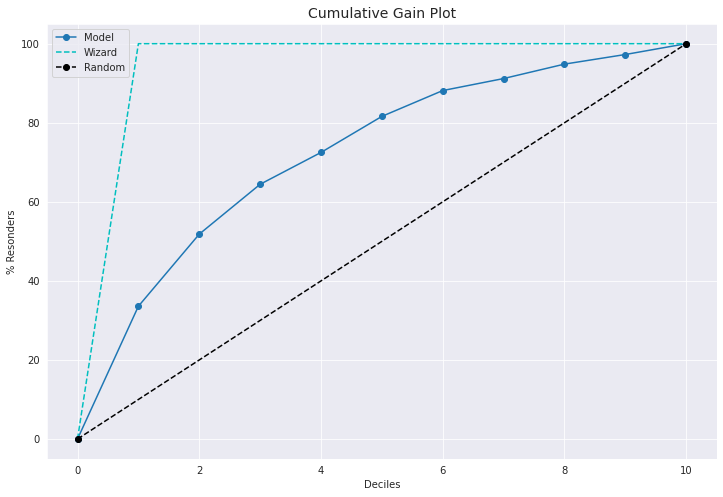

In [76]:
fig = plt.figure(figsize=(12,8))
kds.metrics.plot_cumulative_gain(np.array(y_test), rfc_full_search.predict_proba(X_test_enc)[:,1])
plt.show()

## XGBoost

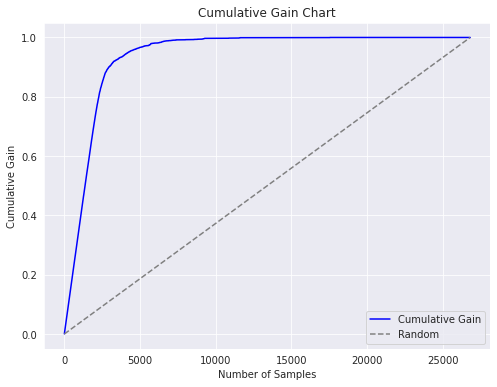

In [77]:
cumulative_gain_chart(y_train, xgb_search_full.predict_proba(X_train_enc)[:,1])

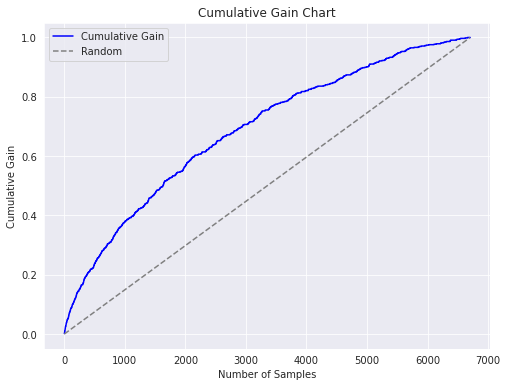

In [78]:
cumulative_gain_chart(y_test, xgb_search_full.predict_proba(X_test_enc)[:,1])

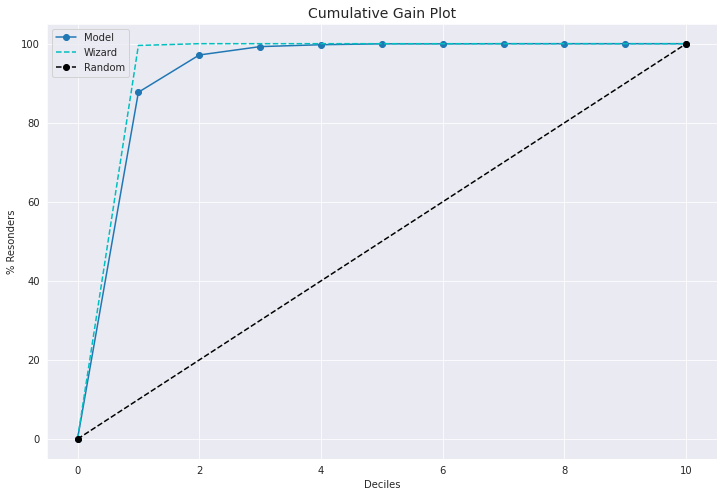

In [79]:
fig = plt.figure(figsize=(12,8))
kds.metrics.plot_cumulative_gain(np.array(y_train), xgb_search_full.predict_proba(X_train_enc)[:,1])
plt.show()

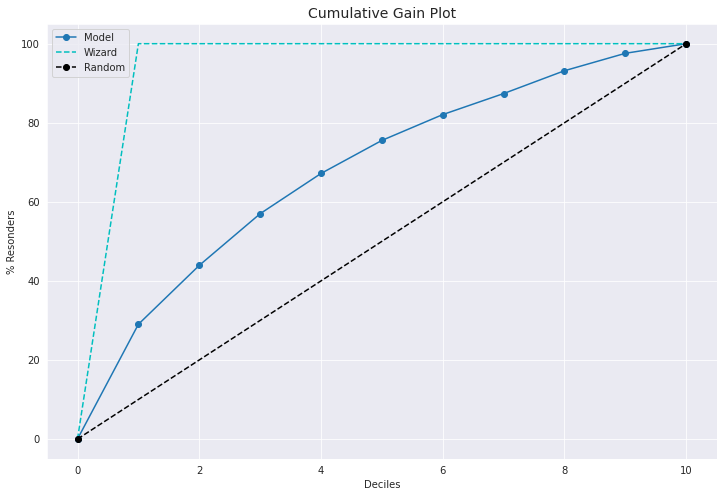

In [80]:
fig = plt.figure(figsize=(12,8))
kds.metrics.plot_cumulative_gain(np.array(y_test), xgb_search_full.predict_proba(X_test_enc)[:,1])
plt.show()

## Catboost

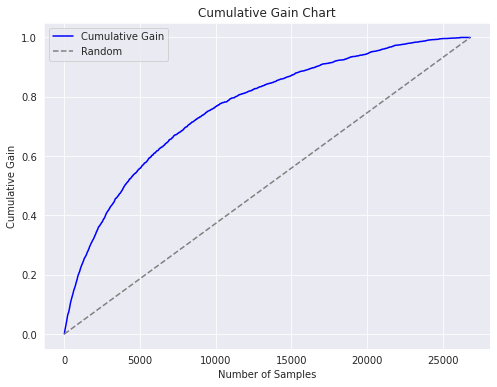

In [81]:
cumulative_gain_chart(y_train, cat_full_search.predict_proba(X_train_cat)[:,1])

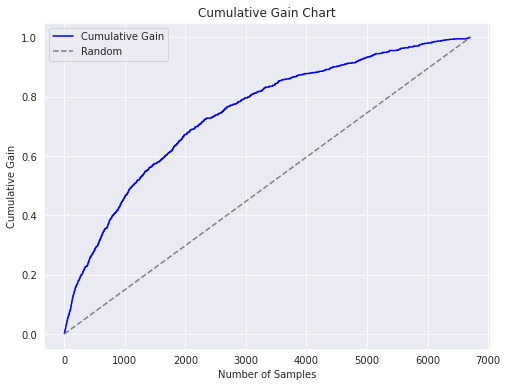

In [82]:
cumulative_gain_chart(y_test, cat_full_search.predict_proba(X_test_cat)[:,1])

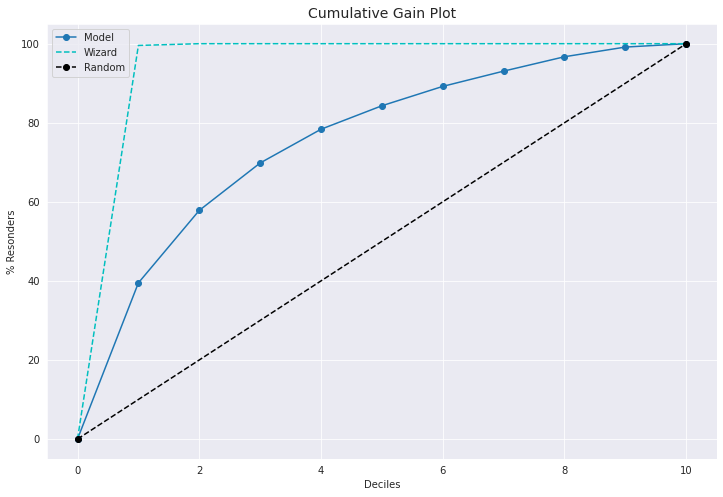

In [83]:
fig = plt.figure(figsize=(12,8))
kds.metrics.plot_cumulative_gain(np.array(y_train), cat_full_search.predict_proba(X_train_cat)[:,1])
plt.show()

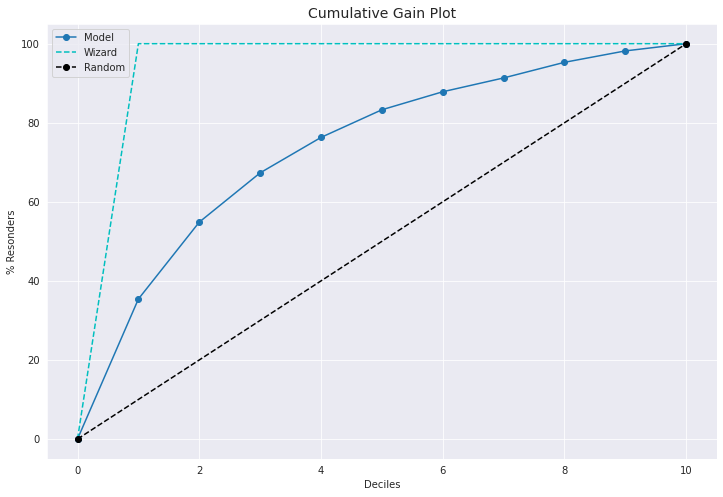

In [84]:
fig = plt.figure(figsize=(12,8))
kds.metrics.plot_cumulative_gain(np.array(y_test), cat_full_search.predict_proba(X_test_cat)[:,1])
plt.show()

# Calibration

## Catboost

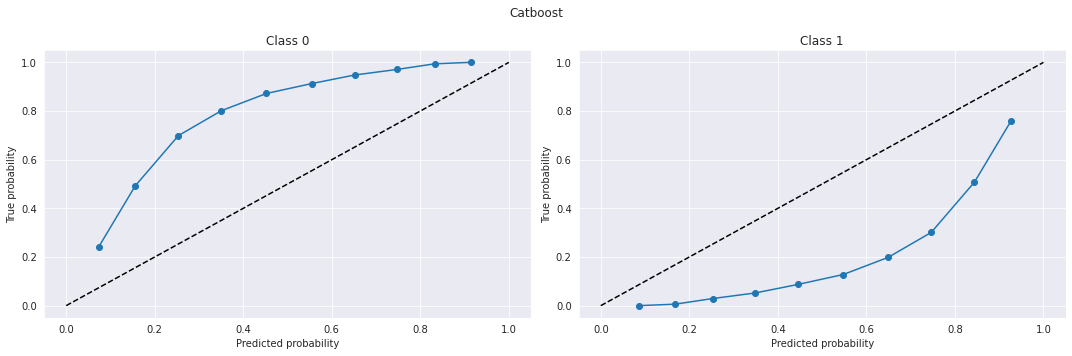

In [108]:
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve


def calibration_plots(true, prob, title):
    """
    Plots calibration curves for a given probability and true labels.
    """

    calibration_curve_values = []
    for i in range(2):
        curve = calibration_curve(
            y_true=true == i,
            y_prob=prob[:, i],
            n_bins=10,
        )
        calibration_curve_values.append(curve)

    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    for i in range(2):
        ax[i].plot(
            calibration_curve_values[i][1], calibration_curve_values[i][0], marker="o"
        )
        ax[i].plot([0, 1], [0, 1], linestyle="--", color="black")
        ax[i].set_title(f"Class {i}")
        ax[i].set_xlabel("Predicted probability")
        ax[i].set_ylabel("True probability")

    fig.suptitle(title)

    plt.tight_layout()
    plt.show()

calibration_plots(y_train, cat_full_search.predict_proba(X_train_cat), "Catboost")

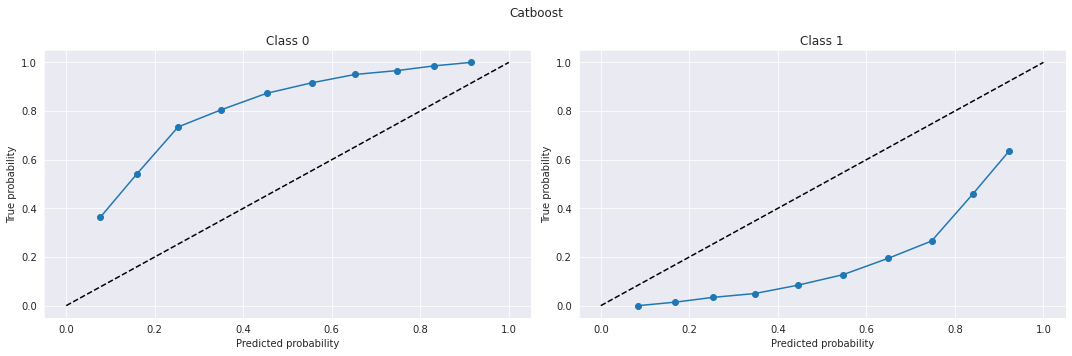

In [140]:
calibration_plots(y_test, cat_full_search.predict_proba(X_test_cat), "Catboost")

In [129]:
raw_scores = cat_full_search.predict_proba(X_train_cat)[:,1]
raw_scores
platt_lr = LogisticRegression()
platt_lr.fit(raw_scores.reshape(-1, 1), y_train)

LogisticRegression()

In [139]:
platt_lr.predict_proba(cat_full_search.predict_proba(X_train_cat)[:,1].reshape(-1, 1))

array([[0.95541389, 0.04458611],
       [0.98016758, 0.01983242],
       [0.97151136, 0.02848864],
       ...,
       [0.58370842, 0.41629158],
       [0.87999577, 0.12000423],
       [0.9212945 , 0.0787055 ]])

In [122]:
cat_full_search.predict_proba(X_train_cat)

array([[0.65944493, 0.34055507],
       [0.80306674, 0.19693326],
       [0.73929613, 0.26070387],
       ...,
       [0.19082895, 0.80917105],
       [0.47515228, 0.52484772],
       [0.5555279 , 0.4444721 ]])

In [141]:
calibrated_probs = platt_lr.predict_proba(cat_full_search.predict_proba(X_test_cat)[:,1].reshape(-1, 1))

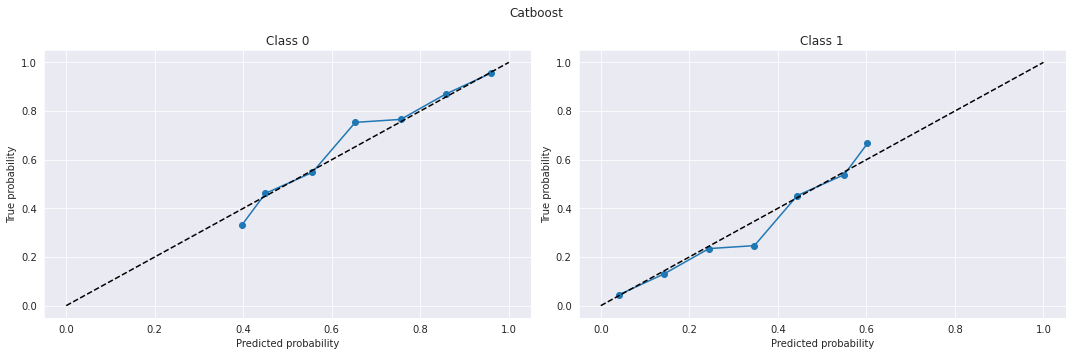

In [142]:
calibration_plots(y_test, calibrated_probs, "Catboost")

No Skill: ROC AUC=0.500
catboost: ROC AUC=0.794


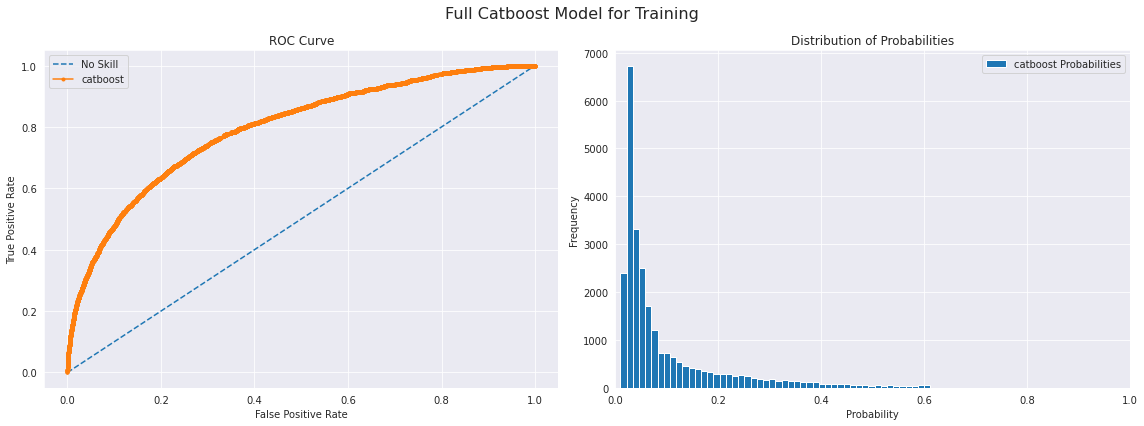

No Skill: ROC AUC=0.500
catboost: ROC AUC=0.770


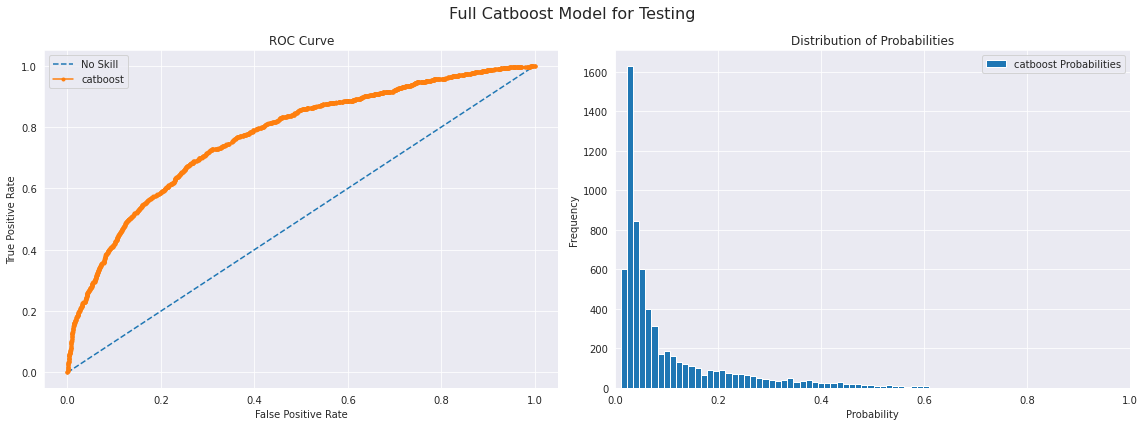

,model,model_type,dataset,accuracy,balanced_accuracy,precision,recall,f1,log_loss,brier,roc_auc
0,catboost,full,train,0.905616,0.552345,0.689095,0.110245,0.190080,0.267683,0.076144,0.793770
1,catboost,full,test,0.903043,0.531812,0.547619,0.069909,0.123989,0.275349,0.078194,0.769903


In [143]:
cat_cal_scores, _ = EvaluateModel(
    model=platt_lr,
    X_train=cat_full_search.predict_proba(X_train_cat)[:,1].reshape(-1, 1),
    X_test=cat_full_search.predict_proba(X_test_cat)[:,1].reshape(-1, 1),
    y_train=y_train,
    y_test=y_test,
    model_name="catboost",
    model_type="full",
).run()
cat_cal_scores

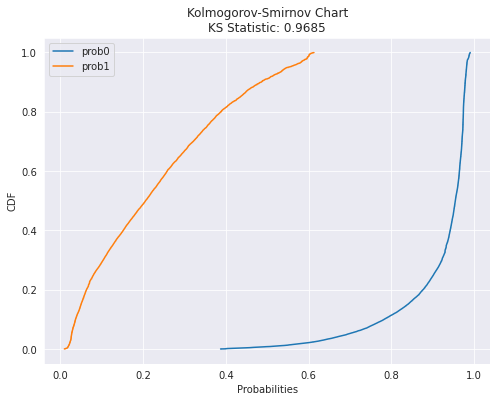

In [144]:
ks_chart(platt_lr.predict_proba(cat_full_search.predict_proba(X_train_cat)[:,1].reshape(-1, 1)), y_train)

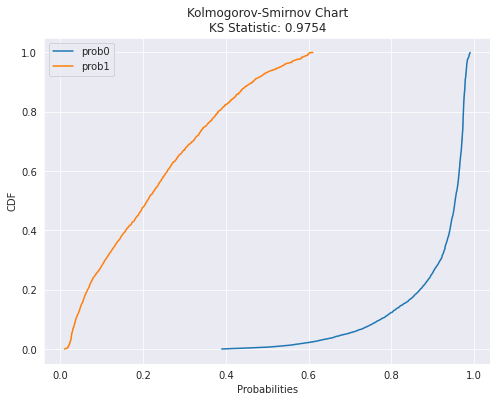

In [145]:
ks_chart(platt_lr.predict_proba(cat_full_search.predict_proba(X_test_cat)[:,1].reshape(-1, 1)), y_test)

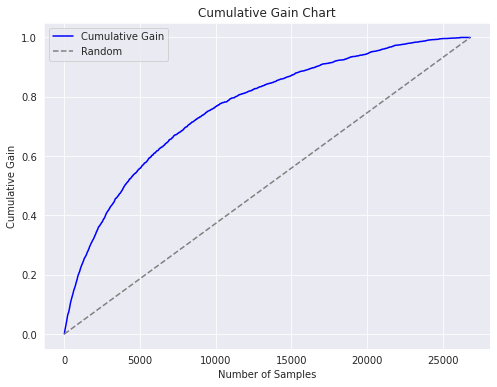

In [146]:
cumulative_gain_chart(
    y_train,
    platt_lr.predict_proba(
        cat_full_search.predict_proba(X_train_cat)[:, 1].reshape(-1, 1)
    )[:, 1],
)

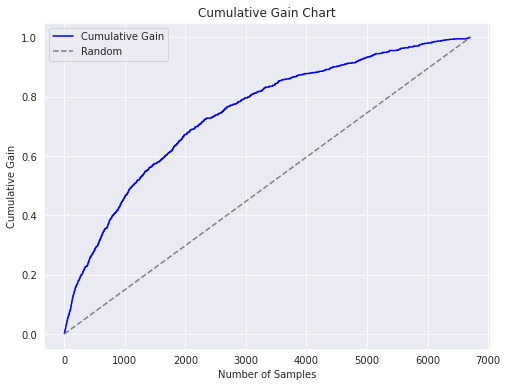

In [147]:
cumulative_gain_chart(
    y_test,
    platt_lr.predict_proba(
        cat_full_search.predict_proba(X_test_cat)[:, 1].reshape(-1, 1)
    )[:, 1],
)

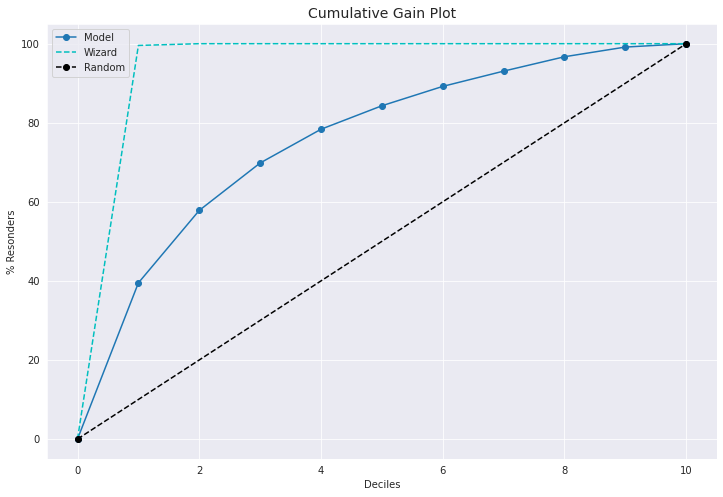

In [148]:
fig = plt.figure(figsize=(12, 8))
kds.metrics.plot_cumulative_gain(
    np.array(y_train),
    platt_lr.predict_proba(
        cat_full_search.predict_proba(X_train_cat)[:, 1].reshape(-1, 1)
    )[:, 1],
)
plt.show()

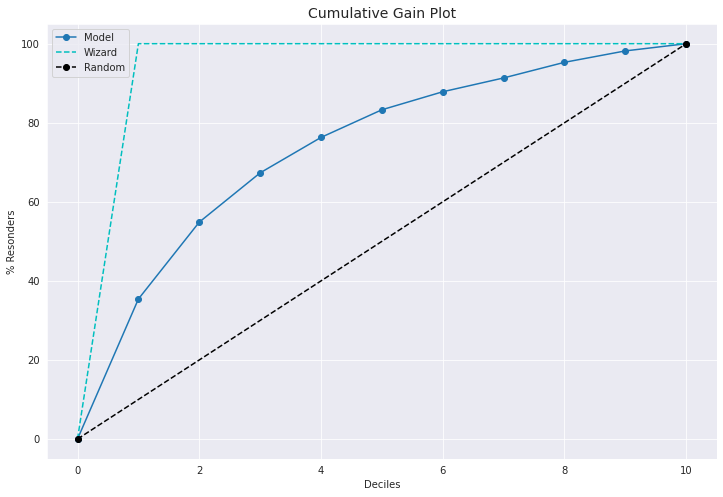

In [149]:
fig = plt.figure(figsize=(12, 8))
kds.metrics.plot_cumulative_gain(
    np.array(y_test),
    platt_lr.predict_proba(
        cat_full_search.predict_proba(X_test_cat)[:, 1].reshape(-1, 1)
    )[:, 1],
)
plt.show()

# Deciles

In [150]:
cat_cal_probs = platt_lr.predict_proba(
        cat_full_search.predict_proba(X_test_cat)[:, 1].reshape(-1, 1)
    )[:, 1]
cat_probs = cat_full_search.predict_proba(X_test_cat)[:,1]

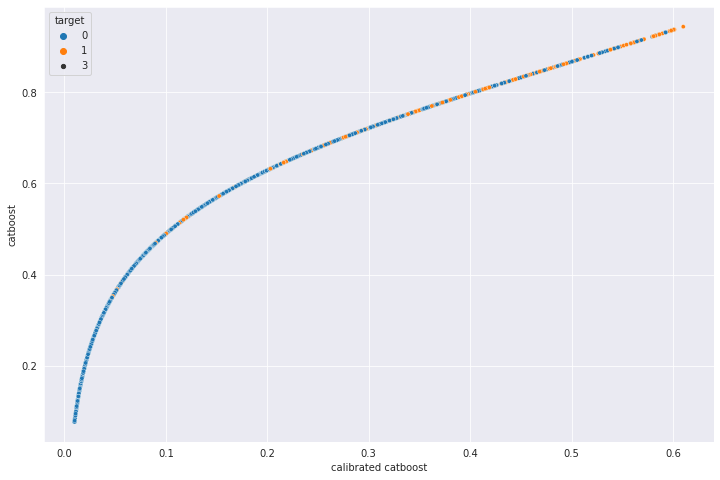

In [151]:
fig = plt.figure(figsize=(12,8))
sns.scatterplot(x=cat_cal_probs, y=cat_probs, hue=y_test, size=3)
plt.xlabel("calibrated catboost")
plt.ylabel("catboost")

plt.show()

In [154]:
platt_lr.predict(
        cat_full_search.predict_proba(X_test_cat)[:, 1].reshape(-1, 1)
    ).sum() / len(y_test)

0.012529832935560859

In [155]:
cat_full_search.predict(X_test_cat).sum() / len(y_test)

0.29295942720763724

In [166]:
output = X_test_base.loc[:,["lg_seq_index"]]
output = output.merge(prospects, how="inner", on="lg_seq_index")
output["prob"] = cat_cal_probs
output["actual"] = y_test
output["decile"] = 9 - pd.qcut(output.prob, 10, labels=False)

output

,lg_seq_index,duns_number,prob,actual,decile
0,2365179,21126444,0.018919,0,9
1,3758425,111190840,0.049574,0,5
2,1205052,118455703,0.302710,0,0
3,479448,876539396,0.430505,0,0
4,2139269,68723433,0.340365,0,0
...,...,...,...,...,...
6699,3183642,111878099,0.080338,0,3
6700,1541683,47034076,0.038923,0,5
6701,1146206,112876802,0.018850,0,9
6702,2048777,106764527,0.023285,0,8


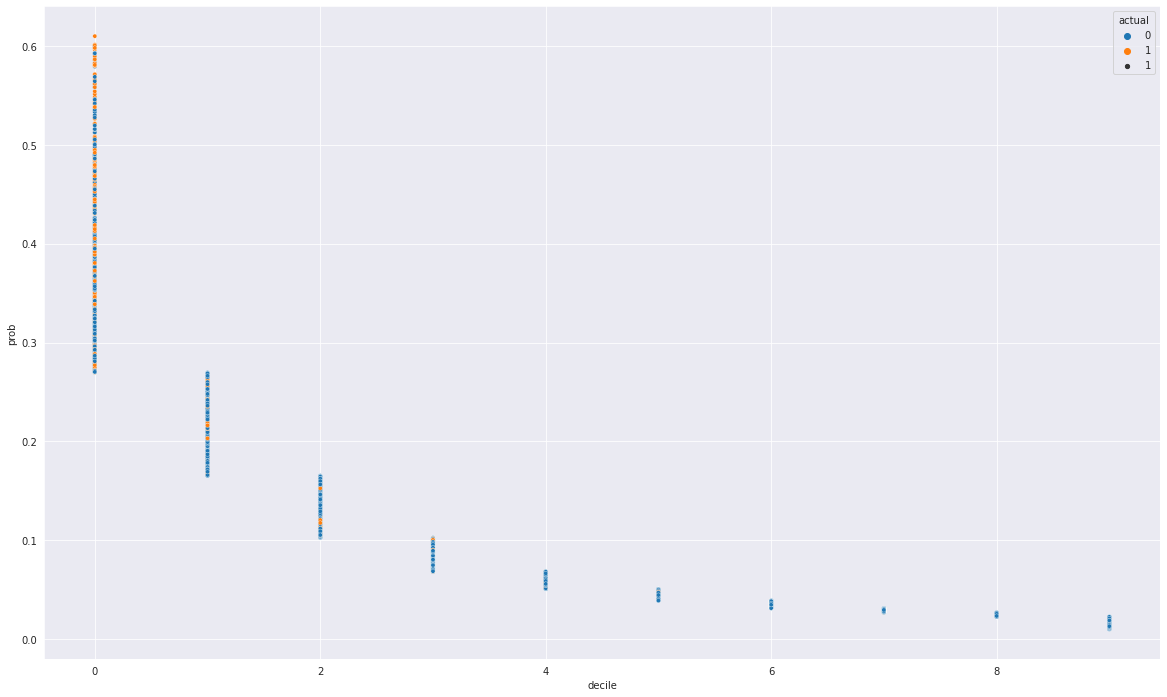

In [167]:
fig = plt.figure(figsize=(20,12))
sns.scatterplot(data=output, x="decile", y="prob", size=1, hue="actual")
plt.show()

In [168]:
output.groupby("decile")["prob"].describe()

,count,mean,std,min,25%,50%,75%,max
decile,,,,,,,,
0,671.0,0.385996,0.086989,0.269716,0.315731,0.367763,0.438826,0.610101
1,670.0,0.215214,0.029266,0.165170,0.190379,0.213186,0.239522,0.269545
2,670.0,0.130404,0.018093,0.102476,0.114362,0.128956,0.145438,0.165072
3,670.0,0.082627,0.010280,0.068053,0.073546,0.080274,0.091332,0.102360
4,671.0,0.058674,0.004831,0.050556,0.054841,0.058155,0.062278,0.068002
5,670.0,0.044646,0.003483,0.038777,0.041381,0.044866,0.047589,0.050472
6,671.0,0.035028,0.002069,0.031156,0.033329,0.035116,0.036651,0.038772
7,670.0,0.028742,0.001340,0.026817,0.027463,0.028759,0.029971,0.031133
8,667.0,0.024986,0.001331,0.022351,0.023911,0.025214,0.026196,0.026812


# Save Models

In [170]:
import pickle

with open(f"{output_path}/calibration_catboost.pkl", "wb") as f:
    pickle.dump(platt_lr, f)
    
with open(f"{output_path}/catboost_full.pkl", "wb") as f:
    pickle.dump(cat_full_search, f)